# Stoneburner, Kurt
- ## DSC 540 - Week 09/10


In [33]:
# //****************************************************************************************
# //*** Set Working Directory to thinkstats folder.
# //*** This pseudo-relative path call should work on all Stoneburner localized projects. 
# //****************************************************************************************

import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#//*** Needed to display the Movie poster :)
from IPython.display import Image, display

# Activity 9: Top 100 ebooks' name extraction from Gutenberg.org

## What is Project Gutenberg? - 
Project Gutenberg is a volunteer effort to digitize and archive cultural works, to "encourage the creation and distribution of eBooks". It was founded in 1971 by American writer Michael S. Hart and is the **oldest digital library.** This longest-established ebook project releases books that entered the public domain, and can be freely read or downloaded in various electronic formats.

## What is this activity all about?
* **This activity aims to scrape the url of the Project Gutenberg's Top 100 ebooks (yesterday's ranking) for identifying the ebook links. **
* **It uses BeautifulSoup4 for parsing the HTML and regular expression code for identifying the Top 100 ebook file numbers.**
* **You can use those book ID numbers to download the book into your local drive if you want**

### Import necessary libraries including regex, and beautifulsoup

In [2]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

### Ignore SSL errors (this code will be given)

In [3]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

### Read the HTML from the URL

In [4]:
guten_url = "http://www.gutenberg.org/browse/scores/top"
response = requests.get(guten_url)

### Write a small function to check the status of web request

In [5]:
#//*** If Response.ok is False there is a problem
if response.ok == False:
    print("Problem downloading the URL")
    print(f"Statis Code: {response.status_code}")
    for x in response:
        print(x)

#//*** If no error we should be good


### Decode the response and pass on to `BeautifulSoup` for HTML parsing

In [6]:
# Write your code here (decode). The decoding functionality is inlined with the Beautiful soup import. This forces
#//*** Decoding of the content based on the value of response.encoding

# Write your code here (pass on to BS)
if response.ok == True:
    #//*** Make soup...Beautiful Soup
    soup = BeautifulSoup(response.content.decode(response.encoding),'html.parser')

### Find all the _href_ tags and store them in the list of links. Check how the list looks like - print first 30 elements

In [7]:
# Write your code here
href_list = soup.find_all('a')

In [8]:
# Write your code here (print the list)
for link in href_list:
    print(link)

<a class="no-hover" href="/" id="main_logo">
<img alt="Project Gutenberg" draggable="false" src="/gutenberg/pg-logo-129x80.png"/>
</a>
<a href="/about/">About
          <span class="drop-icon">▾</span>
</a>
<a href="/about/">About Project Gutenberg</a>
<a href="/policy/collection_development.html">Collection Development</a>
<a href="/about/contact_information.html">Contact Us</a>
<a href="/about/background/">History &amp; Philosophy</a>
<a href="/policy/permission.html">Permissions &amp; License</a>
<a href="/policy/privacy_policy.html">Privacy Policy</a>
<a href="/policy/terms_of_use.html">Terms of Use</a>
<a href="/ebooks/">Search and Browse
      	  <span class="drop-icon">▾</span>
</a>
<a href="/ebooks/">Book Search</a>
<a href="/ebooks/bookshelf/">Bookshelves</a>
<a href="/browse/scores/top">Frequently Downloaded</a>
<a href="/ebooks/offline_catalogs.html">Offline Catalogs</a>
<a href="/help/">Help
          <span class="drop-icon">▾</span>
</a>
<a href="/help/">All help topics →<

### Use regular expression to find the numeric digits in these links. <br>These are the file number for the Top 100 books.

#### Initialize empty list to hold the file numbers

In [9]:
file_numbers = []

* Number 19 to 118 in the original list of links have the Top 100 ebooks' number. 
* Loop over appropriate range and use regex to find the numeric digits in the link (href) string.
* Hint: Use `findall()` method

In [10]:
#//***********************************************************************************
#//*** I'm going to gather the file numbers for the Top 100 EBooks Yesterday
#//***********************************************************************************

#//*** The list of ebooks starts after the value of pattern_start
pattern_start = "#authors-last30"
begin_match = False

#//*** Loop through the a tag lists
for a in href_list:
    #//*** Get the href for each 'a' tag in the list
    item = a.get('href')
    
    #//*** Look for the start of the relevant items, otherwise do nothing
    if pattern_start in item:
        #//*** Start of content found
        begin_match = True
        
        #//*** Advance to the next item
        continue
    
    #//*** Values are found. Harvest the ebook Items
    if begin_match == True:

        #//*** Quit on next Category tag
        if "#" in item:
            break
        #//*** Verify there is ebooks in the href
        if "ebooks" in item:
            file_numbers.append(item.replace("/ebooks/",""))
            

#### Print the file numbers

In [11]:
x = 0
for y in file_numbers:
    x = x + 1
    print(f"{x}. {y}")

1. 1342
2. 84
3. 46
4. 11
5. 6133
6. 43
7. 1080
8. 64317
9. 1661
10. 25344
11. 98
12. 2701
13. 2542
14. 1260
15. 174
16. 1952
17. 5200
18. 16
19. 844
20. 1232
21. 120
22. 2852
23. 219
24. 1400
25. 205
26. 76
27. 345
28. 74
29. 16328
30. 25929
31. 64323
32. 4014
33. 514
34. 23
35. 1250
36. 408
37. 2591
38. 2097
39. 1497
40. 45
41. 158
42. 160
43. 4300
44. 2600
45. 55
46. 64316
47. 215
48. 64320
49. 1184
50. 58585
51. 244
52. 19942
53. 3825
54. 36
55. 2814
56. 768
57. 3207
58. 64319
59. 57426
60. 2554
61. 140
62. 113
63. 730
64. 135
65. 5740
66. 34901
67. 996
68. 42108
69. 2500
70. 64321
71. 863
72. 1727
73. 1934
74. 8102
75. 766
76. 236
77. 35
78. 35899
79. 64318
80. 3600
81. 1998
82. 376
83. 64326
84. 829
85. 1001
86. 902
87. 203
88. 521
89. 147
90. 41
91. 32854
92. 15399
93. 60479
94. 64314
95. 30254
96. 3300
97. 43453
98. 209
99. 37134
100. 61


### How does the `soup` object's text look like? Use `.text()` method and print only first 2000 characters (i.e. do not print the whole thing, it is long).

You will notice lot of empty spaces/blanks here and there. Ignore them. They are part of HTML page markup and its whimsical nature!

In [12]:
print(soup.get_text()[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-01-18186142
last 7 days1294928
last 30 days4934605



Top 100 EBooks yesterd

### Search in the extracted text (using regular expression) from the `soup` object to find the names of top 100 Ebooks (Yesterday's rank)

In [13]:
#//****************************************************************************
#//*** Going to solve this with more Regex and string processing than Soup.
#//****************************************************************************

#//*** Store the Book Names
book_names = []

#//*** Raw text of the entire html document
raw_text = soup.get_text()

#//*** Define the regex: The key is the [\\W\\w]*?. 
#//*** [\\W\\w] - Matches any Word or Non-Word Character. This matches everything including a newline.
#//*** I learned this trick many moons ago. 
#//*** * matches the preceding value (word or non word)
#//*** ? matches 0 or 1 and makes the regex lazy or ungreedy
pattern = re.compile("Top 100 EBooks yesterday[\\W\\w]*?Top 100 EBooks yesterday\nTop 100 Authors yesterday")

#//*** Apply the regex and keep the first result.
#//*** This is the raw string of the content
result = pattern.findall(raw_text)[0]

#//*** Split the results by newline
for line in result.split("\n"):
    #//*** Filter out the garbage
    
    #//*** Skip empty lines
    if len(line) == 0:
        continue
    
    #//*** Filter out the category names, let's get real specific
    #//*** Title must include Top 100
    if "Top 100" in line:
        #//*** And either Ebooks or Authors
        if "EBooks" or "Authors" in line:
            #//*** And yesterday or last 7 days or last 30 days
            if "yesterday" or "last 7 days" or "last 30 days" in line:
                continue
    #//*** This specificity should avoid skipping the wrong titles.
    
    #//*** Remove everything between the Parenthesis ( ) because we can
    paran_pattern = re.compile("\(.+\)")
    #//*** Perform regex findall for parantheses
    paran_replace = paran_pattern.findall(line) 
    
    #//*** Every line *should* have paranthesis, but let's double check that we do. This is a hard learned 
    #//*** lesson, never assume your data result before working on it. Although I violated this rule
    #//*** on line 17.

    if len(paran_replace) > 0:
        
        #//*** Grab first Item, which is string to replace.
        paran_replace = paran_replace[0]
        line = line.replace(paran_replace,"")

    book_names.append(line)


# I honestly don't understand any of this. Why use Beautiful Soup if regex can solve the same problem of parsing a chunk of text?#

#### Create a starting index. It should point at the text _"Top 100 Ebooks yesterday"_. Hint: Use `splitlines()` method of the `soup.text`. It splits the lines of the text of the `soup` object.

#### Loop 1-100 to add the strings of next 100 lines to this temporary list. Hint: `splitlines()` method

#### Use regular expression to extract only text from the name strings and append to an empty list
* Hint: Use `match` and `span` to find indices and use them

#### Print the list of titles

In [14]:
for x in range(0,len(book_names)):
    print(f"{x+1}. [{file_numbers[x]}] {book_names[x]}")

1. [1342] Pride and Prejudice by Jane Austen 
2. [84] Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley 
3. [46] A Christmas Carol in Prose; Being a Ghost Story of Christmas by Charles Dickens 
4. [11] Alice's Adventures in Wonderland by Lewis Carroll 
5. [6133] Arsène Lupin, gentleman-cambrioleur. English by Maurice Leblanc 
6. [43] The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson 
7. [1080] A Modest Proposal by Jonathan Swift 
8. [64317] The Great Gatsby by F. Scott  Fitzgerald 
9. [1661] The Adventures of Sherlock Holmes by Arthur Conan Doyle 
10. [25344] The Scarlet Letter by Nathaniel Hawthorne 
11. [98] A Tale of Two Cities by Charles Dickens 
12. [2701] Moby Dick; Or, The Whale by Herman Melville 
13. [2542] Et dukkehjem. English by Henrik Ibsen 
14. [1260] Jane Eyre: An Autobiography by Charlotte Brontë 
15. [174] The Picture of Dorian Gray by Oscar Wilde 
16. [1952] The Yellow Wallpaper by Charlotte Perkins Gilman 
17. [5200] Metamorph

# Advanced web scraping and data gathering
## Activity 10: Build your own movie database by reading from an API
### This notebook does the following
* Retrieves and prints basic data about a movie (title entered by user) from the web (OMDB database)
* If a poster of the movie could be found, it downloads the file and saves at a user-specified location

In [15]:
import urllib.request, urllib.parse, urllib.error
import json

### Load the secret API key (you have to get one from OMDB website and use that, 1000 daily limit) from a JSON file, stored in the same folder into a variable
Hint: Use **`json.loads()`**

#### Note: The following cell will not be executed in the solution notebook because the author cannot give out his private API key. 
#### Students/users/instructor will need to obtain a key and store in a JSON file. 
#### For the code's sake, we are calling this file `APIkeys.json`. But you need to store your own key in this file.
#### An example file called `"APIkey_Bogus_example.json"` is given along with the notebook. Just change the code in this file and rename as `APIkeys.json`. The file name does not matter of course.

In [16]:
#//*************************************************
#//*** Read the API key from a JSON encoded file
#//*************************************************
f = open("z_omdb_api.key", "r")

#//*** Fugley Pythonic type conversion
#//*** Loads the file into Dictionary via JSON.loads
#//*** Gets the API key value using the 'api' key
#//*** prepends apikey= so the resulting value is URL ready :]
apikey = "apikey=" + json.loads(f.read())['api']
f.close()

### The final URL to be passed should look like: http://www.omdbapi.com/?t=movie_name&apikey=secretapikey 
Do the following,
* Assign the OMDB portal (http://www.omdbapi.com/?) as a string to a variable `serviceurl` (don't miss the `?`)
* Create a variable `apikey` with the last portion of the URL ("&apikey=secretapikey"), where `secretapikey` is your own API key (an actual code)
* The movie name portion i.e. "t=movie_name" will be addressed later

In [17]:
#//*******************************************************************************
#//*** The Current doc on omdbapi.com the apikey should be included first.
#//*** Stylistically this makes sense, since that's the static part of the call.
#//*******************************************************************************
service_url = "http://www.omdbapi.com/?" + apikey + "&"

### Write a utility function to download a poster of the movie based on the information from the jason dataset and save in your local folder

* Use `os` module
* The poster data is stored in the JSON key 'Poster'
* You may want to split the name of the Poster file and extract the file extension only. Let's say the extension is ***'jpg'***.
* Then later join this extension to the movie name and create a filename like ***movie.jpg***
* Use the Python command `open` to open a file and write the poster data. Close the file after done.
* This function may not return anything. It just saves the poster data as an image file.

In [48]:
#//*** Download the movie poster and display it
#//*** Instead of merely downloading the movie poster, display it in the Notebook
#//*** Das is Ganz Klar!

def get_poster(input_name,input_url):
    
    #//*******************************************************************
    #//*** get file extension, assume the extenstion is after the last .
    #//*** Since we treat the file as temporary, this step isnt needed
    #//*** But it's a nice-to-have
    #//*******************************************************************
    if "." in input_url:
        filename = "z_9_10_" + input_name + "." + input_url.split(".")[-1]
    else:
        #//*** No extension found for some reason. Let's call it a .byebye file.
        #//*** Since it's going byebye no matter what we name it.
        
        filename = input_name + ".byebye"
    
    #//*** Download the file with urllib
    try:
        
        response = urllib.request.urlopen(input_url)
        
    except:
        print("[No Poster image]")
        return
    
   
    #//*** Write Poster to disk
    f = open(filename, "wb") 
    f.write(response.read())
    f.close()
    
    #//*** Needed to display the Movie poster :)
    display(Image(filename=filename))
    
    #//*** Delete the local image, to keep things uncluttered
    if os.path.isfile(filename):
        os.remove(filename)

### Write a utility function `print_json` to print nicely the movie data from a JSON file (which we will get from the portal)
Here are the keys of a JSON file,

'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language','Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID'

But why limit ourselves to this list? We should print all-the-JSON.
If the JSON is layered, we'll use recursion.

In [47]:
def print_json(input_obj,level=0):

    if isinstance(input_obj,dict) == False:
        tab=""
        for x in range(level):
            tab += "\t"
        print(f"{tab}{input_obj}")
        return
   #//*** If there is a valid Poster URL and Title.
    #//*** Download and Display the movie poster
    if "Poster" in input_obj.keys() and "Title" in input_obj.keys():
        poster_url = input_obj["Poster"]
        poster_name = input_obj["Title"]
        
        try:
            get_poster(poster_name,poster_url)
        except:
            print("[No Poster Available]")

    #//*** Tabs are used for recursion
    #//*** For every level of recursion, add a tab
    #//*** My test data only goes down to two levels, it will be fun to test with more
    
    tab=""
    for x in range(level):
        tab += "\t"
    
    #//*** Loop through the JSON keys and values
    for key,value in input_obj.items():
        
        #//*** If the response is True, skip the display
        #//*** This will print on a fale response
        if key == "Response" and value == "True":
            continue
        
        #//*** Skip Poster, it should already by handled
        if key == "Poster":
            continue
    
        #//*** If the Value is a string, print the key and value.
        if isinstance(value,str) or isinstance(value,int):
            print(f"{tab}{key}: {value}")

        #//*** If the Object is a list, print the key
        #//*** Iterate through the list calling print_json on each item with a level + 1.
        #//*** Which will increase the tab level with each call ---- Fun Stuff
        elif isinstance(value,list):
                print(f"{tab}{key}:")
                for item in value:
                    print_json(item,level+1)
        elif isinstance(value,dict):
            print(f"{tab}{key}:")
            print_json(value,level+1)            
        else:
            #//*** If it's not a list or string, print it anyway. This leaves a future debugging path open
            print(f"{tab}-->{key}: {type(value)} {value}")

### Write a utility function `search_movie` to search a movie by its name, print the downloaded JSON data (use the `print_json` function for this) and save the movie poster in the local folder (use `save_poster` function for this)

* Use `try-except` loop for this i.e. try to connect to the web portal, if successful proceed but if not (i.e. exception raised) then just print an error message
* Here use the previously created variables `serviceurl` and `apikey`
* You have to pass on a dictionary with a key `t` and the movie name as the corresponding value to `urllib.parse.urlencode()` function and then add the `serviceurl` and `apikey` to the output of the function to construct the full URL
* This URL will be used for accessing the data
* The JSON data has a key called `Response`. If it is `True`, that means the read was successful. Check this before processing the data. If not successful, then print the JSON key `Error`, which will contain the appropriate error message returned by the movie database.

In [20]:
#//*** Search for a movie on OMDB and print the resulting JSON
def search_movie(input_movie):
    #//*** Moving service URL locally into the function, otherise best practice would be to pass it in.
    service_url = "http://www.omdbapi.com/?" + apikey + "&"
    
    #//*** Format the Movie title for the API request
    #//*** Replace 
    input_movie = "t=" + input_movie.replace(" ","+")
    request_url = service_url + input_movie
    
    try:
        
        response = urllib.request.urlopen(request_url)
        
    except HTTPError as e:
        print("Uh Oh - There is a problem making the API call")
        print(e)
        return
    
    except URLError as e:
        print(f"Failed to connect to server.")
        print(f"Reason: {e.reason}")
    
    #//*** Received a valid response as a string
    #//*** Convert to JSON
    #//*** Print and Display the attributes using the print_json function
    print_json(json.loads(response.read().decode()))



### Test `search_movie` function by entering *Titanic*

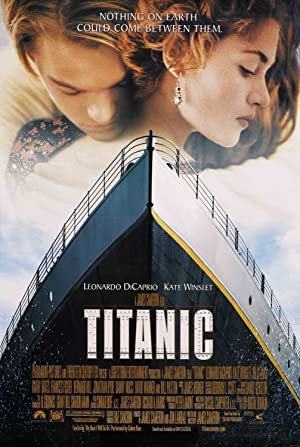

Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: USA, Mexico
Awards: Won 11 Oscars. Another 112 wins & 83 nominations.
Ratings:
	Source: Internet Movie Database
	Value: 7.8/10
	Source: Rotten Tomatoes
	Value: 89%
	Source: Metacritic
	Value: 75/100
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,048,704
imdbID: tt0120338
Type: movie
DVD: N/A
BoxOffice: $659,363,944
Production: 20th Century Fox, Lightstorm Entertainment, Paramount Pictures
Website: N/A


In [49]:
search_movie("Titanic")

In [50]:
top10_url = "https://collider.com/top-10-netflix-movies-list-most-popular/"
response = requests.get(top10_url)
#//*** If Response.ok is False there is a problem
if response.ok == False:
    print("Problem downloading the URL")
    print(f"Statis Code: {response.status_code}")
    for x in response:
        print(x)

#//*** If no error we should be good
# Write your code here (decode). The decoding functionality is inlined with the Beautiful soup import. This forces
#//*** Decoding of the content based on the value of response.encoding

# Write your code here (pass on to BS)
if response.ok == True:
    #//*** Make soup...Beautiful Soup
    soup = BeautifulSoup(response.content.decode(response.encoding),'html.parser')


In [51]:
#//*** Fun exercise. Because I'd rather do this than waste time on the Twitters.
#//*** Gather the Netflix Current Top 10 shows from Collider. And feed them into OMDB.
#//*** Should be Fun
raw_soup_list = soup.find_all('h2')

pattern = re.compile("^[\\W]*[\\d]*\.\\W*")

non_text_pattern = re.compile("[\\W]+?")

ignore_char = ["+","%"]

top10_netflix = []
for item in raw_soup_list:
    if (len(item.text) > 1):
        matches = pattern.findall(item.text)
        if len(matches) > 0:
            
            #print(f"{matches} -{item.text.replace(matches[0],'')}-")
            #//*** Replace Space with + and & with %26 for url encoding 
            temp_str = item.text.replace(matches[0],'').replace(" ","+").replace("&","%26")
            
            #//*** Remove all other non-text characters
            non_text_match = non_text_pattern.findall(temp_str)
            
            #//*** Loop through all non-text characters found
            for rem_char in non_text_match:
                #//*** Ignore value non-text for encoding
                if rem_char not in ignore_char:
                    #//***Remove waht's left 
                    temp_str = temp_str.replace(rem_char,"")
            
            top10_netflix.append(temp_str)
           
        

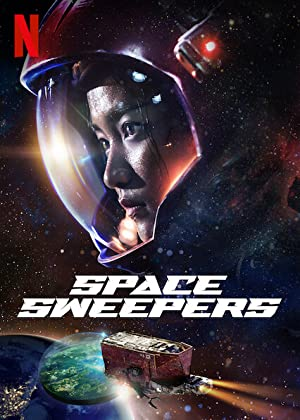

Title: Space Sweepers
Year: 2021
Rated: TV-MA
Released: 05 Feb 2021
Runtime: 136 min
Genre: Action, Adventure, Drama, Fantasy, Sci-Fi
Director: Sung-hee Jo
Writer: N/A
Actors: Song Joong-Ki, Kim Tae-ri, Seon-kyu Jin, Hae-Jin Yoo
Plot: Set in the year 2092 and follows the crew of a space junk collector ship called The Victory. When they discover a humanoid robot named Dorothy that's known to be a weapon of mass destruction, they get involved in a risky business deal.
Language: Korean, English
Country: South Korea
Awards: N/A
Ratings:
	Source: Internet Movie Database
	Value: 6.6/10
Metascore: N/A
imdbRating: 6.6
imdbVotes: 6,602
imdbID: tt12838766
Type: movie
DVD: N/A
BoxOffice: N/A
Production: N/A
Website: N/A


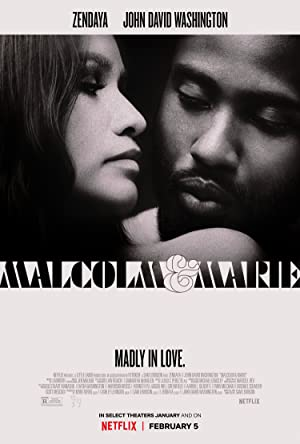

Title: Malcolm & Marie
Year: 2021
Rated: R
Released: 05 Feb 2021
Runtime: 106 min
Genre: Drama, Romance
Director: Sam Levinson
Writer: Sam Levinson
Actors: Zendaya, John David Washington
Plot: A director and his girlfriend's relationship is tested after they return home from his movie premiere and await critics' responses.
Language: English
Country: USA
Awards: N/A
Ratings:
	Source: Internet Movie Database
	Value: 6.6/10
	Source: Metacritic
	Value: 55/100
Metascore: 55
imdbRating: 6.6
imdbVotes: 86
imdbID: tt12676326
Type: movie
DVD: N/A
BoxOffice: N/A
Production: N/A
Website: N/A


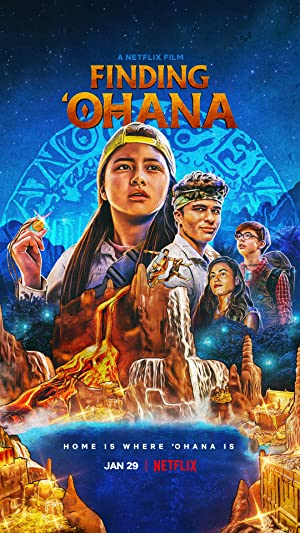

Title: Finding 'Ohana
Year: 2021
Rated: PG
Released: 29 Jan 2021
Runtime: 123 min
Genre: Action, Adventure, Comedy, Family
Director: Jude Weng
Writer: Christina Strain (screenplay by), Christina Strain
Actors: Kelly Hu, Ke Huy Quan, Chris Parnell, Marc Evan Jackson
Plot: A summer in rural O‘ahu takes an exciting turn for two Brooklyn-raised siblings when a journal pointing to long-lost treasure sets them on an epic adventure with new friends, and leads them to reconnect with their Hawaiian heritage.
Language: English
Country: USA
Awards: N/A
Ratings:
Metascore: N/A
imdbRating: N/A
imdbVotes: N/A
imdbID: tt10332588
Type: movie
DVD: N/A
BoxOffice: N/A
Production: N/A
Website: N/A


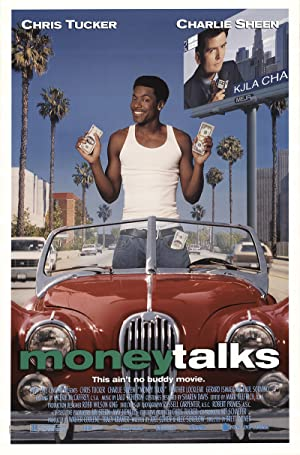

Title: Money Talks
Year: 1997
Rated: R
Released: 22 Aug 1997
Runtime: 97 min
Genre: Action, Comedy, Crime, Thriller
Director: Brett Ratner
Writer: Joel Cohen, Alec Sokolow
Actors: Chris Tucker, Charlie Sheen, Heather Locklear, Elise Neal
Plot: Sought by police and criminals, a small-time huckster makes a deal with a TV newsman for protection.
Language: English, French
Country: USA
Awards: 1 nomination.
Ratings:
	Source: Internet Movie Database
	Value: 6.2/10
	Source: Rotten Tomatoes
	Value: 16%
Metascore: N/A
imdbRating: 6.2
imdbVotes: 27,444
imdbID: tt0119695
Type: movie
DVD: N/A
BoxOffice: $40,922,619
Production: New Line Cinema
Website: N/A


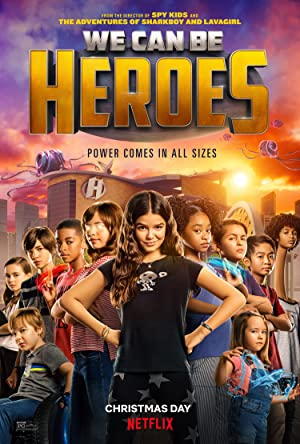

Title: We Can Be Heroes
Year: 2020
Rated: PG
Released: 25 Dec 2020
Runtime: 100 min
Genre: Action, Comedy, Drama, Family, Fantasy
Director: Robert Rodriguez
Writer: Robert Rodriguez
Actors: YaYa Gosselin, Lyon Daniels, Andy Walken, Hala Finley
Plot: When alien invaders kidnap Earth's superheroes, their children must team up and learn to work together if they want to save their parents and the world.
Language: English
Country: USA
Awards: N/A
Ratings:
	Source: Internet Movie Database
	Value: 4.7/10
	Source: Metacritic
	Value: 51/100
Metascore: 51
imdbRating: 4.7
imdbVotes: 8,592
imdbID: tt10600398
Type: movie
DVD: N/A
BoxOffice: N/A
Production: N/A
Website: N/A


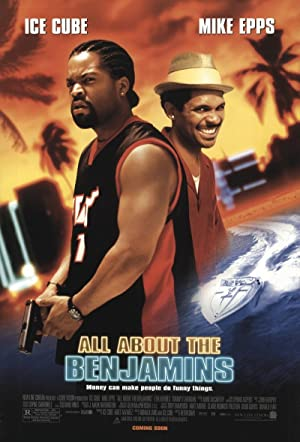

Title: All About the Benjamins
Year: 2002
Rated: R
Released: 08 Mar 2002
Runtime: 95 min
Genre: Action, Comedy, Crime, Thriller
Director: Kevin Bray
Writer: Ronald Lang, Ice Cube
Actors: Ice Cube, Mike Epps, Tommy Flanagan, Carmen Chaplin
Plot: Bounty hunter Bucum chases bail-jumper Reggie, who runs right into the scene of a diamond heist and murder and gets shot at as well. Later they become partners in their pursuit of the $20M in diamonds and lottery ticket. Their women join.
Language: English, French
Country: USA, Germany
Awards: N/A
Ratings:
	Source: Internet Movie Database
	Value: 5.9/10
	Source: Rotten Tomatoes
	Value: 30%
	Source: Metacritic
	Value: 34/100
Metascore: 34
imdbRating: 5.9
imdbVotes: 12,603
imdbID: tt0278295
Type: movie
DVD: N/A
BoxOffice: $25,916,319
Production: New Line Cinema
Website: N/A
[No Poster Available]
Title: Are We There Yet?
Year: 2005
Rated: PG
Released: 21 Jan 2005
Runtime: 95 min
Genre: Adventure, Comedy, Family, Fantasy, Romance
Director: Brian Lev

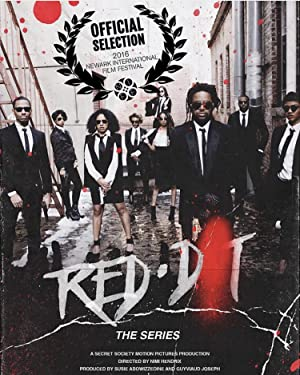

Title: Red Dot
Year: 2014–
Rated: N/A
Released: 20 Jan 2014
Runtime: 9 min
Genre: Crime
Director: N/A
Writer: N/A
Actors: Guyviaud Joseph, Sadeeah Bunch, Tanayah Flores, Sylvia Nicole Edmonson
Plot: A firm of semi-trained hit-men operates under the guise of a video production company.
Language: English
Country: USA
Awards: N/A
Ratings:
	Source: Internet Movie Database
	Value: 7.4/10
Metascore: N/A
imdbRating: 7.4
imdbVotes: 7
imdbID: tt3463550
Type: series
totalSeasons: 1


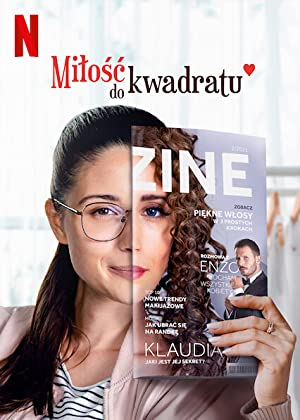

Title: Squared Love
Year: 2021
Rated: N/A
Released: 11 Feb 2021
Runtime: 101 min
Genre: Comedy, Romance
Director: Filip Zylber
Writer: N/A
Actors: Miroslaw Baka, Mateusz Banasiuk, Adrianna Chlebicka, Krzysztof Czeczot
Plot: A celebrity journalist and renowned womanizer starts to rethink his life choices after he falls for a mysterious model who leads a double life.
Language: Polish
Country: Poland
Awards: N/A
Ratings:
Metascore: N/A
imdbRating: N/A
imdbVotes: N/A
imdbID: tt13846542
Type: movie
DVD: N/A
BoxOffice: N/A
Production: N/A
Website: N/A


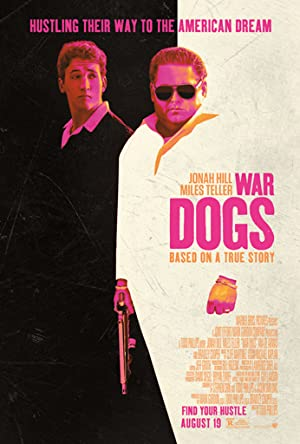

Title: War Dogs
Year: 2016
Rated: R
Released: 19 Aug 2016
Runtime: 114 min
Genre: Biography, Comedy, Crime, Drama, War
Director: Todd Phillips
Writer: Stephen Chin (screenplay), Todd Phillips (screenplay), Jason Smilovic (screenplay), Guy Lawson (Rolling Stone article "Arms and the Dudes")
Actors: Miles Teller, Steve Lantz, Gregg Weiner, David Packouz
Plot: Loosely based on the true story of two young men, David Packouz and Efraim Diveroli, who won a three hundred million dollar contract from the Pentagon to arm America's allies in Afghanistan.
Language: English, Arabic, Albanian, Romanian
Country: USA, Cambodia, Romania
Awards: Nominated for 1 Golden Globe. Another 2 nominations.
Ratings:
	Source: Internet Movie Database
	Value: 7.1/10
	Source: Rotten Tomatoes
	Value: 61%
	Source: Metacritic
	Value: 57/100
Metascore: 57
imdbRating: 7.1
imdbVotes: 177,010
imdbID: tt2005151
Type: movie
DVD: N/A
BoxOffice: $43,034,523
Production: Joint Effort, Warner Bros. Pictures, The Mark Gordon Compa

In [52]:
#//*** Feed the Top 10 list to OMDB
for show in top10_netflix:
    search_movie(show)

### Test `search_movie` function by entering "*Random_error*" (obviously this will not be found and you should be able to check whether your error catching code is working properly)

In [25]:
search_movie("Random_error")

Response: False
Error: Movie not found!


### Look for a folder called 'Posters' in the same directory you are working in. It should contain a file called 'Titanic.jpg'. Open and see if the poster came alright!

It doesn't, because I deleted the files after displaying them

3. Connect to the Twitter API and do a simple data pull

a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment)

b. Sign in to apps.twitter.com

c. Click “Create New App”

d. Give your app a name and description

e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until last minute to complete this portion of the assignment

f. Create an access token

g. You should receive a consumer key and a token

h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

i. How to Create a Twitter App and API Interface via Python. (Grogan, 2016)

ii. Welcome Python-Twitter’s Documentation!  (The Python-Twitter Developers, 2016)

In [26]:
#//*********************************************************************************
#//*** Read the API keys from a JSON encoded file
#//*** Located in the ignore_folder sub directory
#//*** This Folder is added to the .gitignore file and does not show up on Github
#//*** This is per the Authentication Best Practices from Twitter
#//*********************************************************************************
f = open("./ignore_folder/coke.rares", "r")

#//*** Fugley Pythonic type conversion
#//*** Loads the file into Dictionary via JSON.loads
#//*** Gets the API key value using the 'api' key
#//*** prepends apikey= so the resulting value is URL ready :]
secrets = json.loads(f.read())
f.close()


       

In [27]:
#//*************************************************************************************************************
#//*** I liberally borrowed from the Twitter sample code. And by borrowed I mean copied.
#//*** I added a query for cats that has media and printed the results with the PRINT_JSON function from above.
#//*** This is a minimum effort, due to my personal animus against Twitter (I think it's dumb).
#//*** It has its uses academically and I'll spend more time figuring out Twitter when and if I have too.
#//*************************************************************************************************************
#//*** Why did Twitter thrive? and RSS die? These questions make me fee like a technological luddite
#//*************************************************************************************************************
import requests
import os

def auth():
    return os.environ.get("BEARER_TOKEN")


def create_url():
    #query = "from:twitterdev -is:retweet"
    query = "covid"
    query = "covid has:images"
    query = "cats has:media lang:en"
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    #tweet_fields = "tweet.fields=author_id"
    tweet_fields = "tweet.fields=attachments,author_id,created_at,public_metrics,source"
    media_fields = "&media.fields=duration_ms,public_metrics,type"
    media_fields = "&expansions=attachments.media_keys&media.fields=duration_ms,height,media_key,preview_image_url,public_metrics,type,url,width"
    #url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}".format(query, tweet_fields
    url = f"https://api.twitter.com/2/tweets/search/recent?query={query}&{tweet_fields}{media_fields}"
    return url


def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers


def connect_to_endpoint(url, headers):
    response = requests.request("GET", url, headers=headers)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()


def main():
    bearer_token = secrets['bearer']
    url = create_url()
    headers = create_headers(bearer_token)
    json_response = connect_to_endpoint(url, headers)
    #print(json.dumps(json_response, indent=4, sort_keys=True))
    print_json(json_response)

main()

200
data:
	attachments:
		media_keys:
			3_1361495752112013316
	public_metrics:
		retweet_count: 0
		reply_count: 0
		like_count: 0
		quote_count: 0
	id: 1361495754695733249
	created_at: 2021-02-16T02:00:57.000Z
	source: Twitter for Android
	author_id: 1302046961906987009
	text: Threads and info!

A bit about me

Likes: 
Anime
Kpop, jpop, cpop, ect
Art
Cats
Horror

Dislikes:
Cheese
Annoying kids
Milk
Babysitting
School https://t.co/heP4fduFsj
	public_metrics:
		retweet_count: 56
		reply_count: 0
		like_count: 0
		quote_count: 0
	id: 1361495748584509441
	created_at: 2021-02-16T02:00:56.000Z
	source: Twitter for iPhone
	author_id: 1193599597563674624
	text: RT @TheStourbridge: This my friends is the face of the cat who never gave up his relentless aim and optimism in purloining more dinners tha…
	attachments:
		media_keys:
			3_1361492363743555587
	public_metrics:
		retweet_count: 2
		reply_count: 0
		like_count: 0
		quote_count: 0
	id: 1361495702896070656
	created_at: 2021-02-16T02:00:4

4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

a. Line

b. Scatter

c. Bar

d. Histogram

e. Density Plot

f. Pie Chart

**There are two sets of graphs. The first is a combination histogram and bar chart. Each bar chart includes a color coded bar chart of the histogram of each value. There are two sets, The first is ordered by total Despair Count. The Second total Joy Count. I've been experimenting with graphing using loops with a range of success.**

**The bar histgram charts involve nested loops. The first loop generates the bar chart for each candy using the values of Joy,Meh,N/A, & Despair. These values are kept in a list for generic looping. The Nested bar loop is applied to each candy category**

**The second set of graphs is a line chart displaying the "Feels" of each candy value. The value for "Feels" is calculated by Joy-Despair/n. This is how the Boing Boing Candy Survey presented their data.**

In [28]:
#//**** Load the Boing Boing Candy Data
candy_df = pd.read_csv("z_candy_df.csv")


C:\Users\family\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [29]:
import matplotlib.pyplot as plt 

# //*** Legends automatically generate too many labels based on my looping method.
# //*** Remove the Duplicate Legends. I wrote this for DSC 530 and it keeps on giving.
def deduplicate_legend(input_ax):
    # //**** Get handle and label list for the current legend
    # //**** Use first instance, toss the rest.
    handles, labels = input_ax.get_legend_handles_labels()

    handle_dict = {}

    for x in range(len(labels)):
        if labels[x] not in handle_dict.keys():
            # //*** Label = handle
            handle_dict[labels[x]] = handles[x]

    # //*** Build unique output ists and handles
    out_handles = []
    out_labels = []
    
    for label,handle in handle_dict.items():
        out_handles.append(handle)
        out_labels.append(label)
    
    return out_handles,out_labels

   


In [30]:
#//*** Build a histogram by summing the categorical values.

#//*** Rename the indexes back to categorical names
pretty_rows = { 1 : 'Joy', 2 : 'Despair', 3 : 'Meh', 0 : 'N/A'}

#//*** Get the columns that have candy values ignores year and timestamp
candy_cols = candy_df.columns[2:] 

#//*** New Data frame for the Histogram
hist_df = pd.DataFrame()

#//**** Build a Histogram of each column
for col in candy_cols:
    hist_df[col] = candy_df[col].value_counts().sort_index().rename(index=pretty_rows)

#//*** Transpose the Histogram
#//*** This 
hist_df = hist_df.transpose()

#//*** sum each of the values and sort from greatest to least.
#//*** Use this to sort all the values from greatest to least
sorted_values = list(hist_df.sum().sort_values(ascending=False).index)

#//*** Look upon the despair!!! People hate candy more than it brings them Joy!!!!
#//*** BWhaahahahahahahaha. This is of course likely due to the control questions like Vicodin
print(sorted_values)

#//*** Sort by DESPAIR!!!!!!!
hist_df = hist_df.sort_values(by=sorted_values, ascending=False) 

#//*** Transpose the Data frame for plotting
hist_df = hist_df.transpose()

print(hist_df.head(5))

['Despair', 'Joy', 'Meh', 'N/A']
         Broken glow stick  Gum from baseball cards  Dental paraphenalia  \
N/A                    386                      503                  357   
Joy                    148                      357                  545   
Despair               7905                     7341                 7295   
Meh                    207                      445                  449   

         Kale smoothie  \
N/A                544   
Joy                493   
Despair           7288   
Meh                321   

         Candy that is clearly just the stuff given out for free at restaurants  \
N/A                                                    382                        
Joy                                                    298                        
Despair                                               7255                        
Meh                                                    711                        

         White Bread  Creepy Religious 

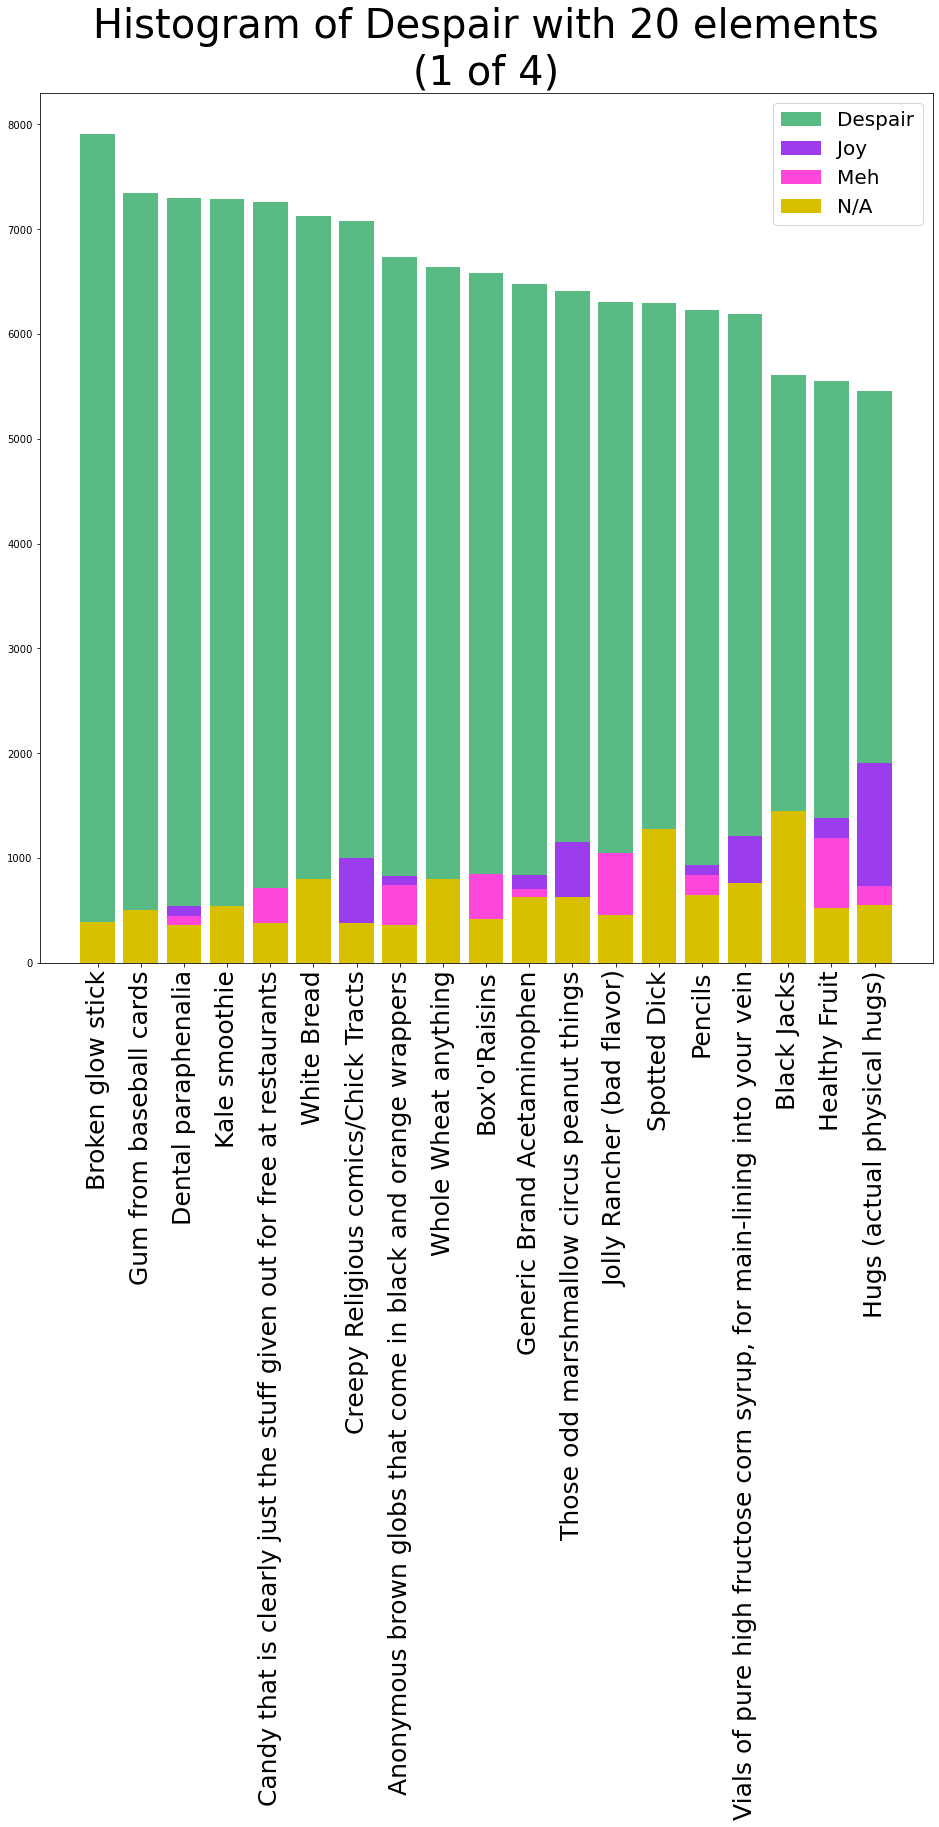

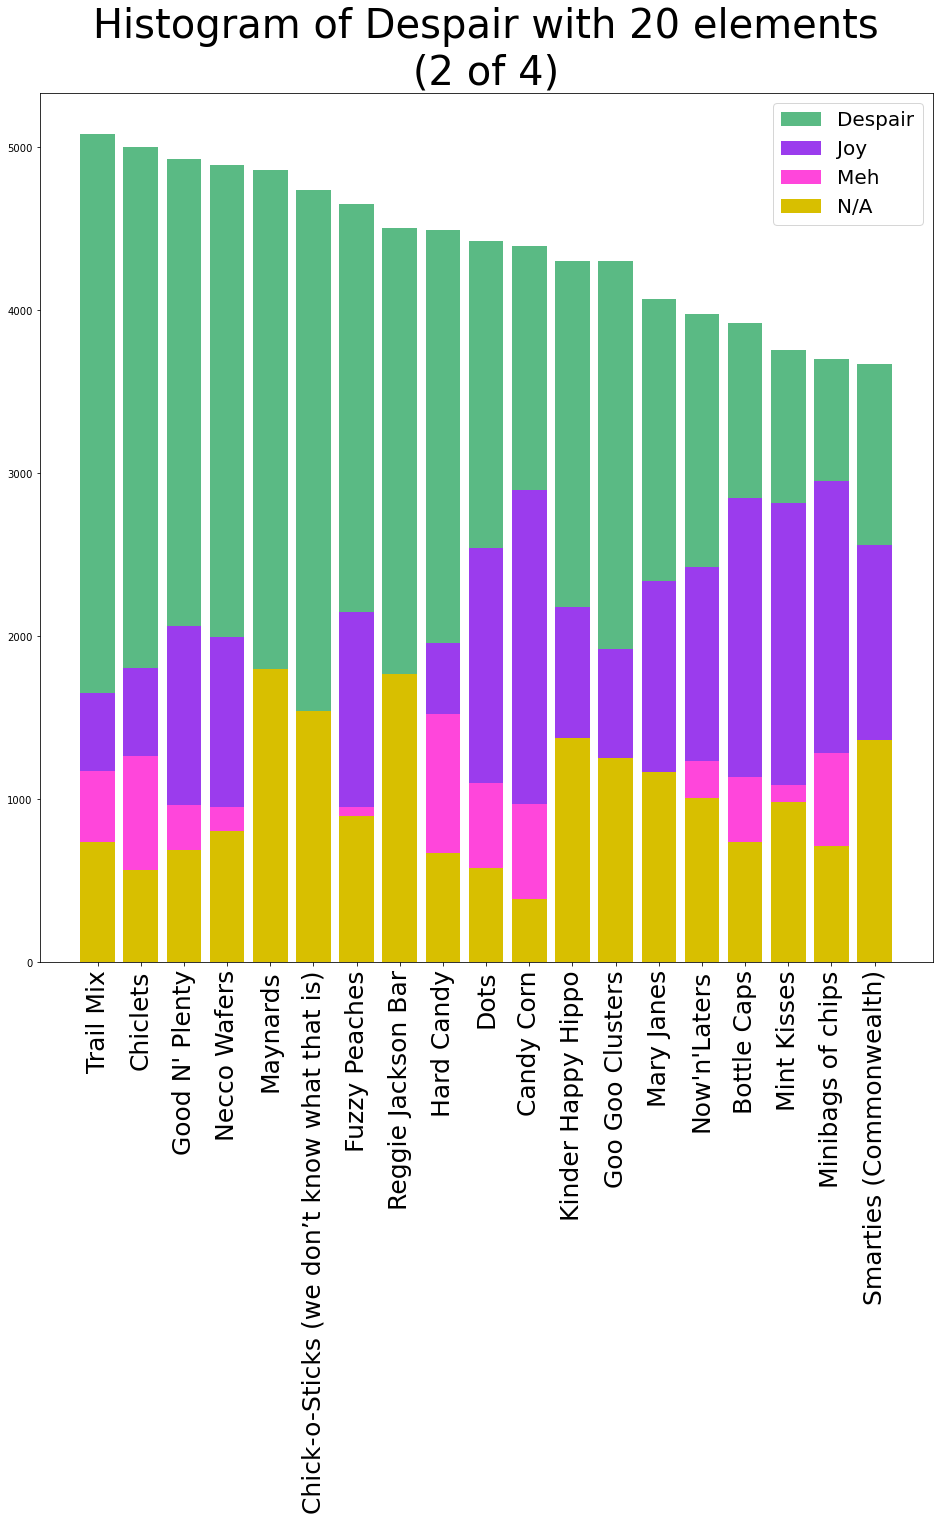

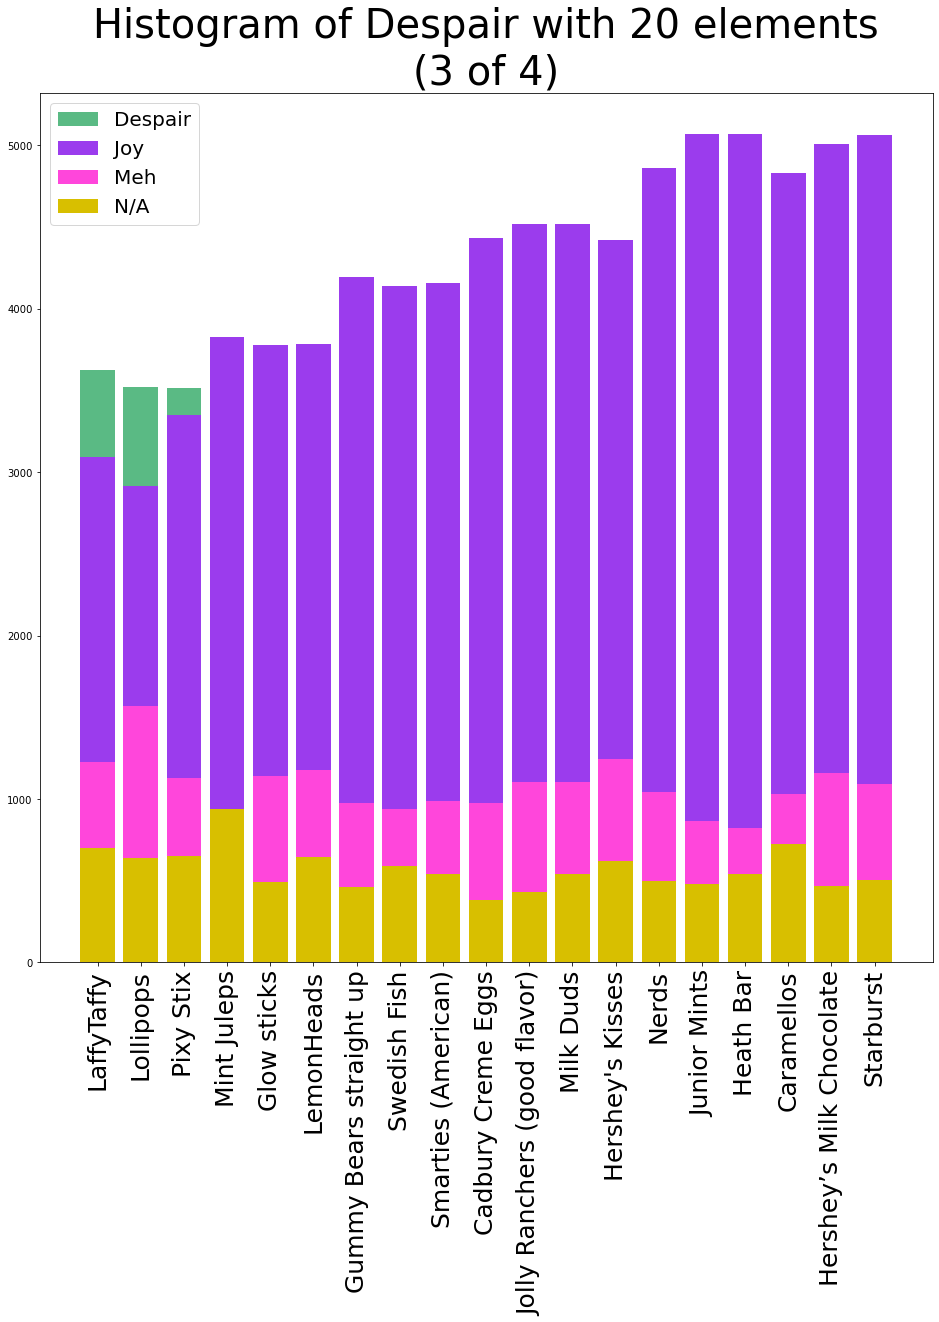

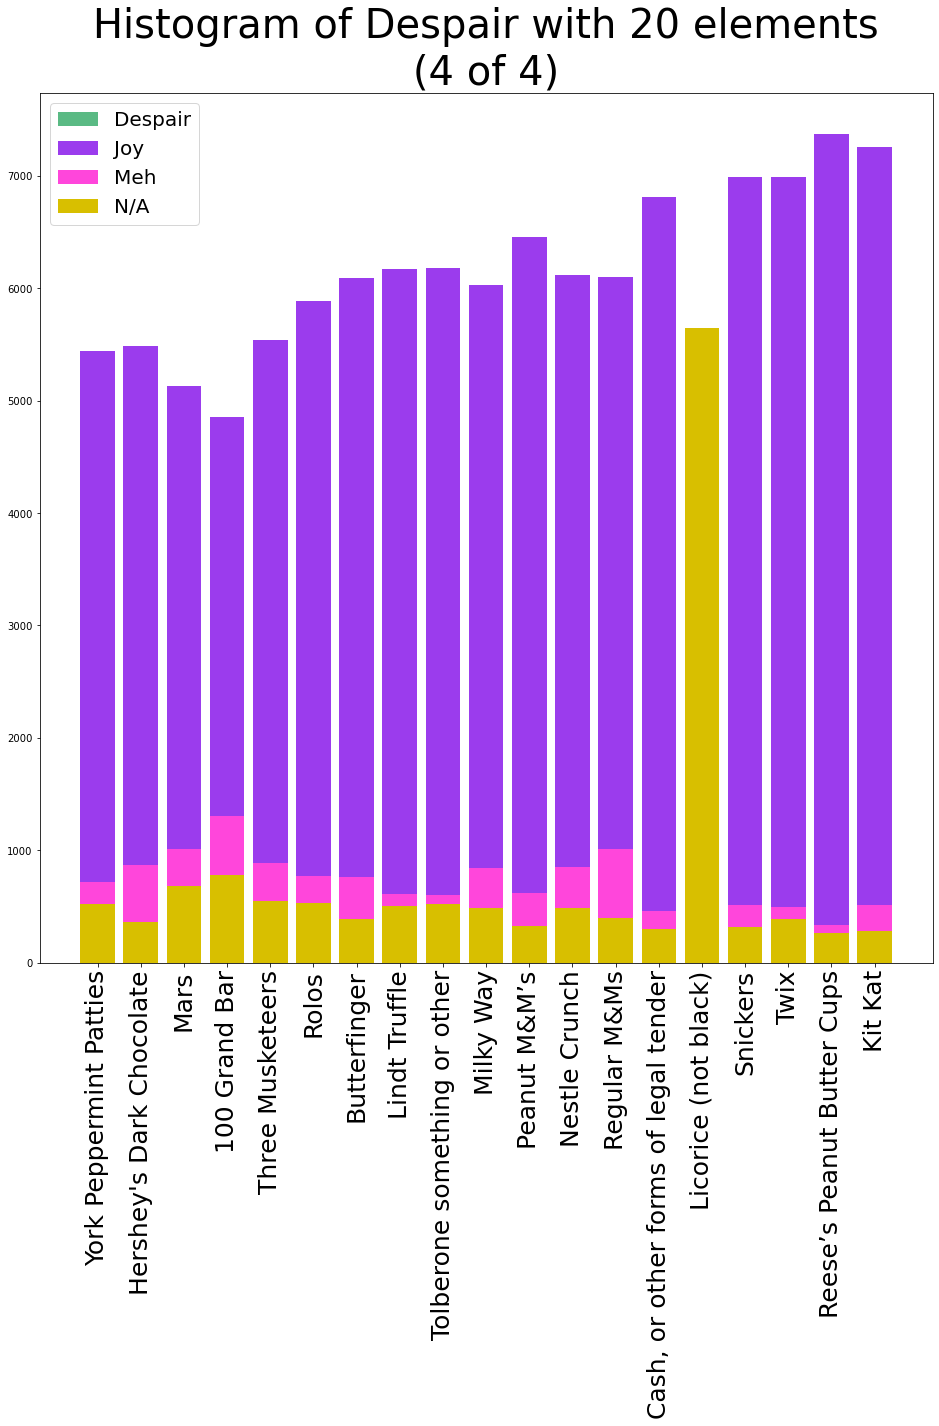

In [31]:
#//*** Display the Histogram of DESPAIR!
#//*** Which is a bar chart and Histogram in ONE!!!
#//*** Because....I have no other reason than because I can
#//*** And I like playing with loops and making big graphs.
#//*** Display count determines the number of columns per graph. There are 80 columns, we could put them all one
#//*** graph, but it would be pretty illegible


display_count = 20
width = .8



color_dict = {
    'Joy' : "#9b3ced",
    'Despair' : "#5ABA84",
    'Meh' : "#ff46db",
    'N/A' : "#d8bf00",
}

#for col in candy_cols:
#    counts_df[col] = candy_df[col].value_counts().sort_index().rename(index=pretty_rows)



#//*** Set the default display size to 80% of the display count. It adds some flexibility to the display size.
plt.rcParams['figure.figsize'] = [display_count*.8, display_count*.8] 

#//*** Divide the columns by the display_count size
#//*** The columns are divided by column index value
for graph_loop in range(0,int( (len(candy_cols)/ display_count))):
    
    #//*** Create the Start index of columns
    min_dex = (graph_loop*display_count)
    #//*** Create the end index of columns
    max_dex = min_dex +(display_count-1)
    

    fig,ax = plt.subplots()
    
    #//*** Draw each bar based on the order of sorted values OF DESPAIR!!!
    #//*** Single line of code generates a bar chart for each value "Despair/Joy/Meh/NA"
    #//*** The .loc is the row value using min_dex & max_dex to select the columns.
    for row in sorted_values:
            ax.bar(hist_df.loc[row].index[min_dex:max_dex],hist_df.loc[row][min_dex:max_dex],width, color=color_dict[row], label=row)

    
    plt.xticks(rotation=90,fontsize=display_count*1.25)

    handles,labels = deduplicate_legend(ax)
    plt.legend(handles,labels, fontsize=display_count)
    plt.title(f"Histogram of Despair with {display_count} elements\n({graph_loop+1} of {int( (len(candy_cols)/ display_count))})",fontsize=display_count*2)
    plt.show()
    
plt.rcParams['figure.figsize'] = [10,10] 

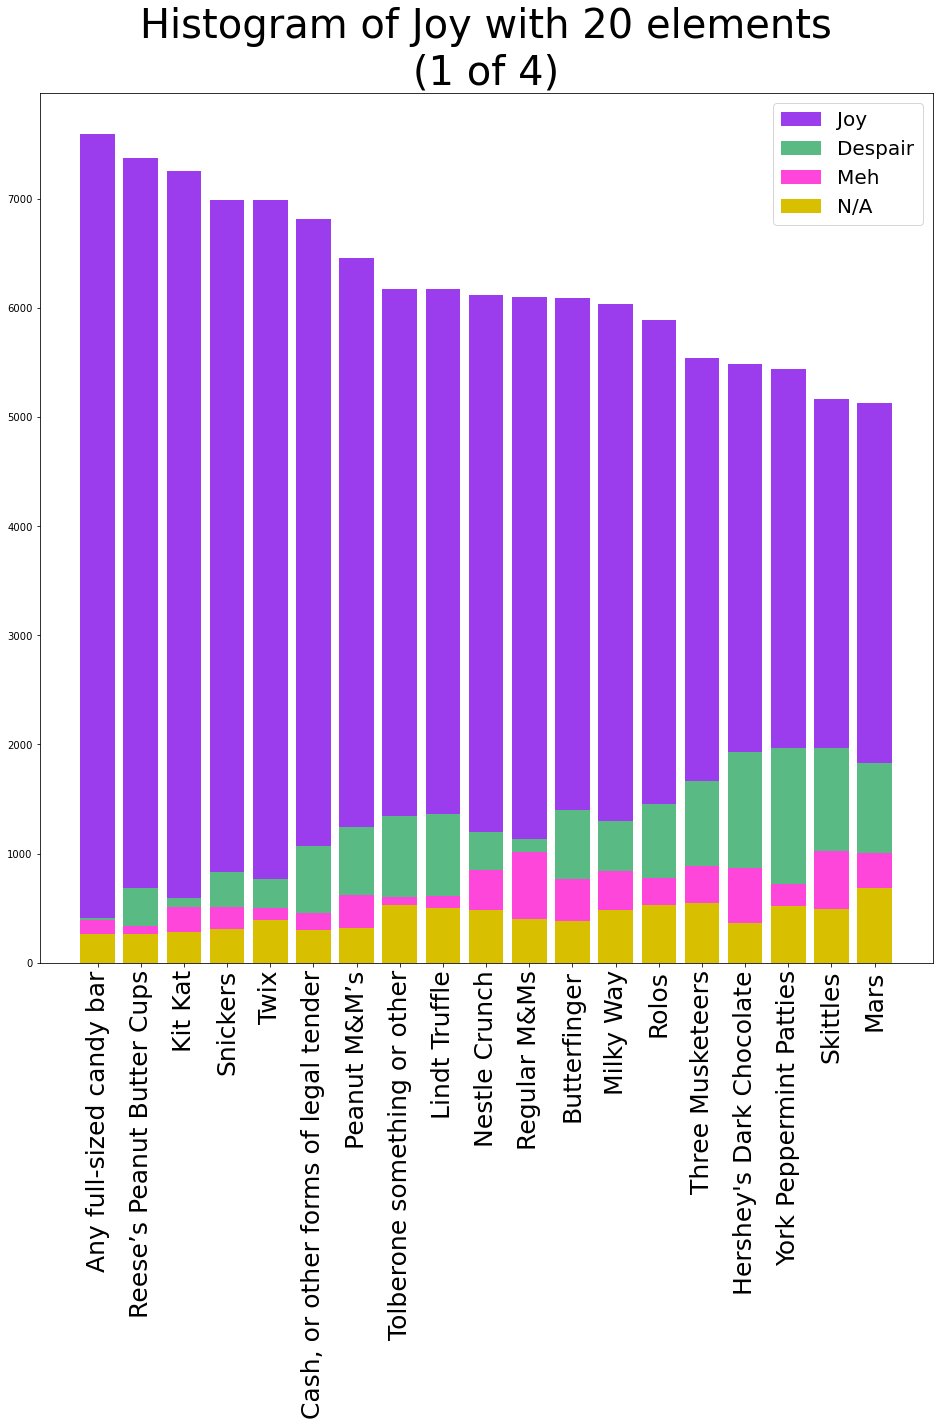

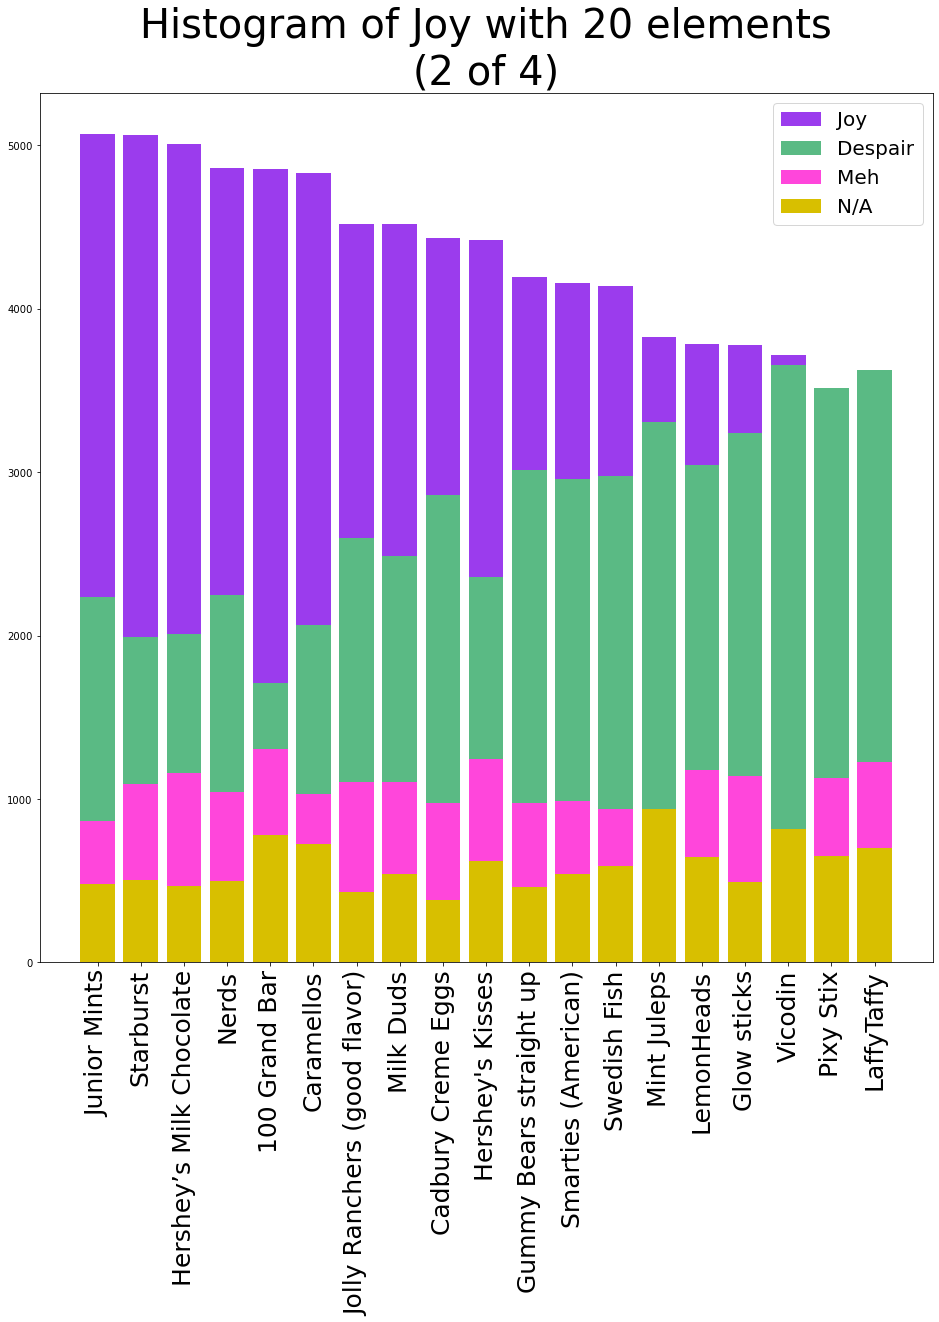

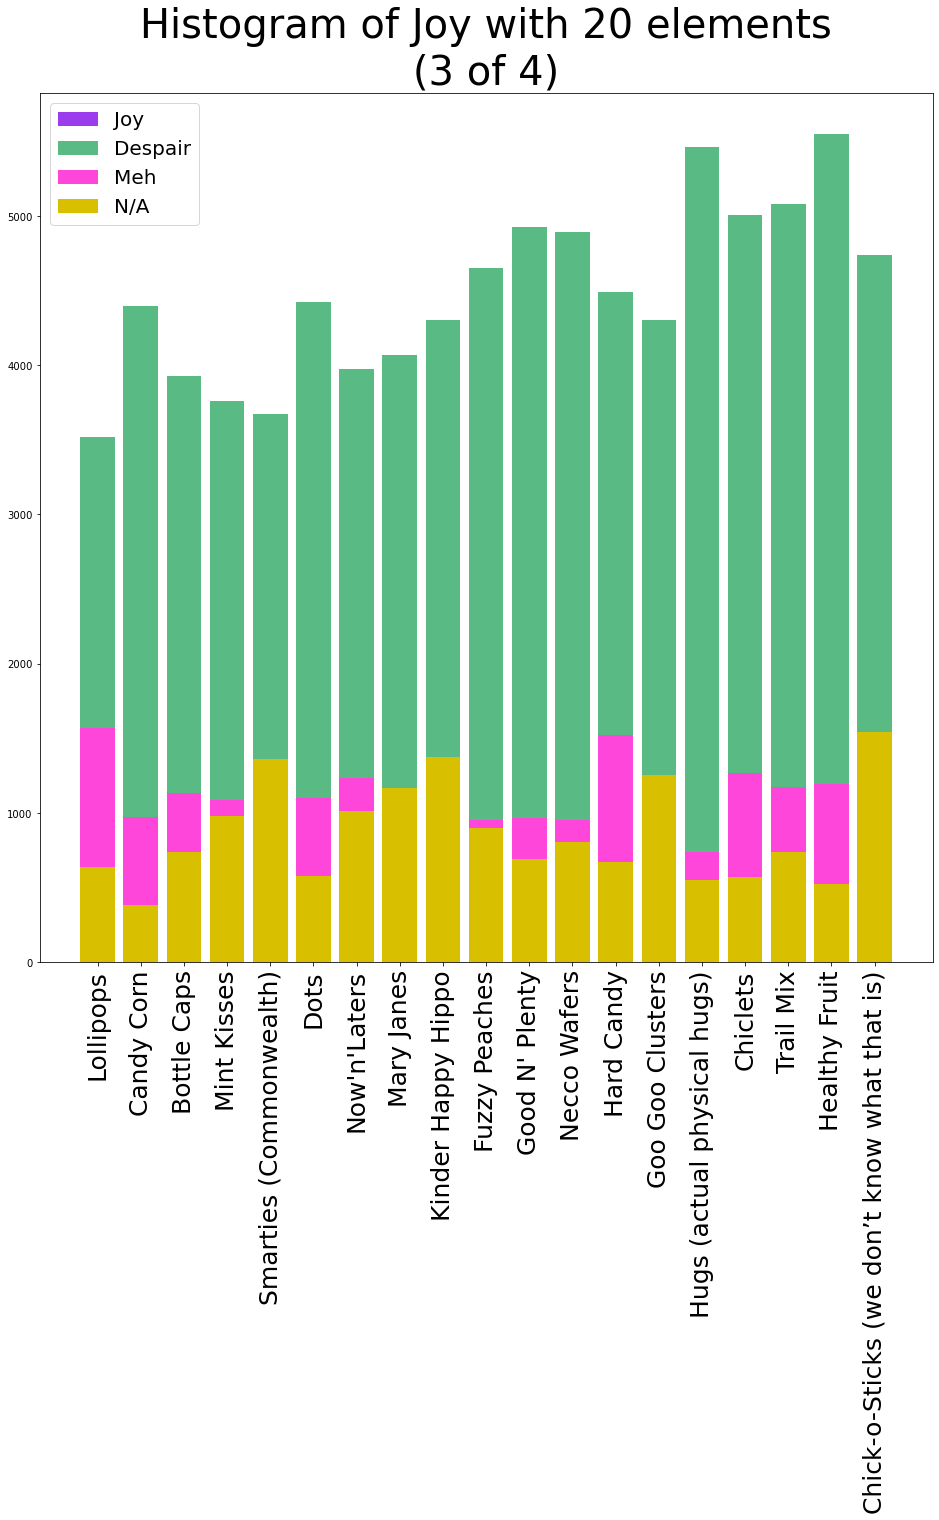

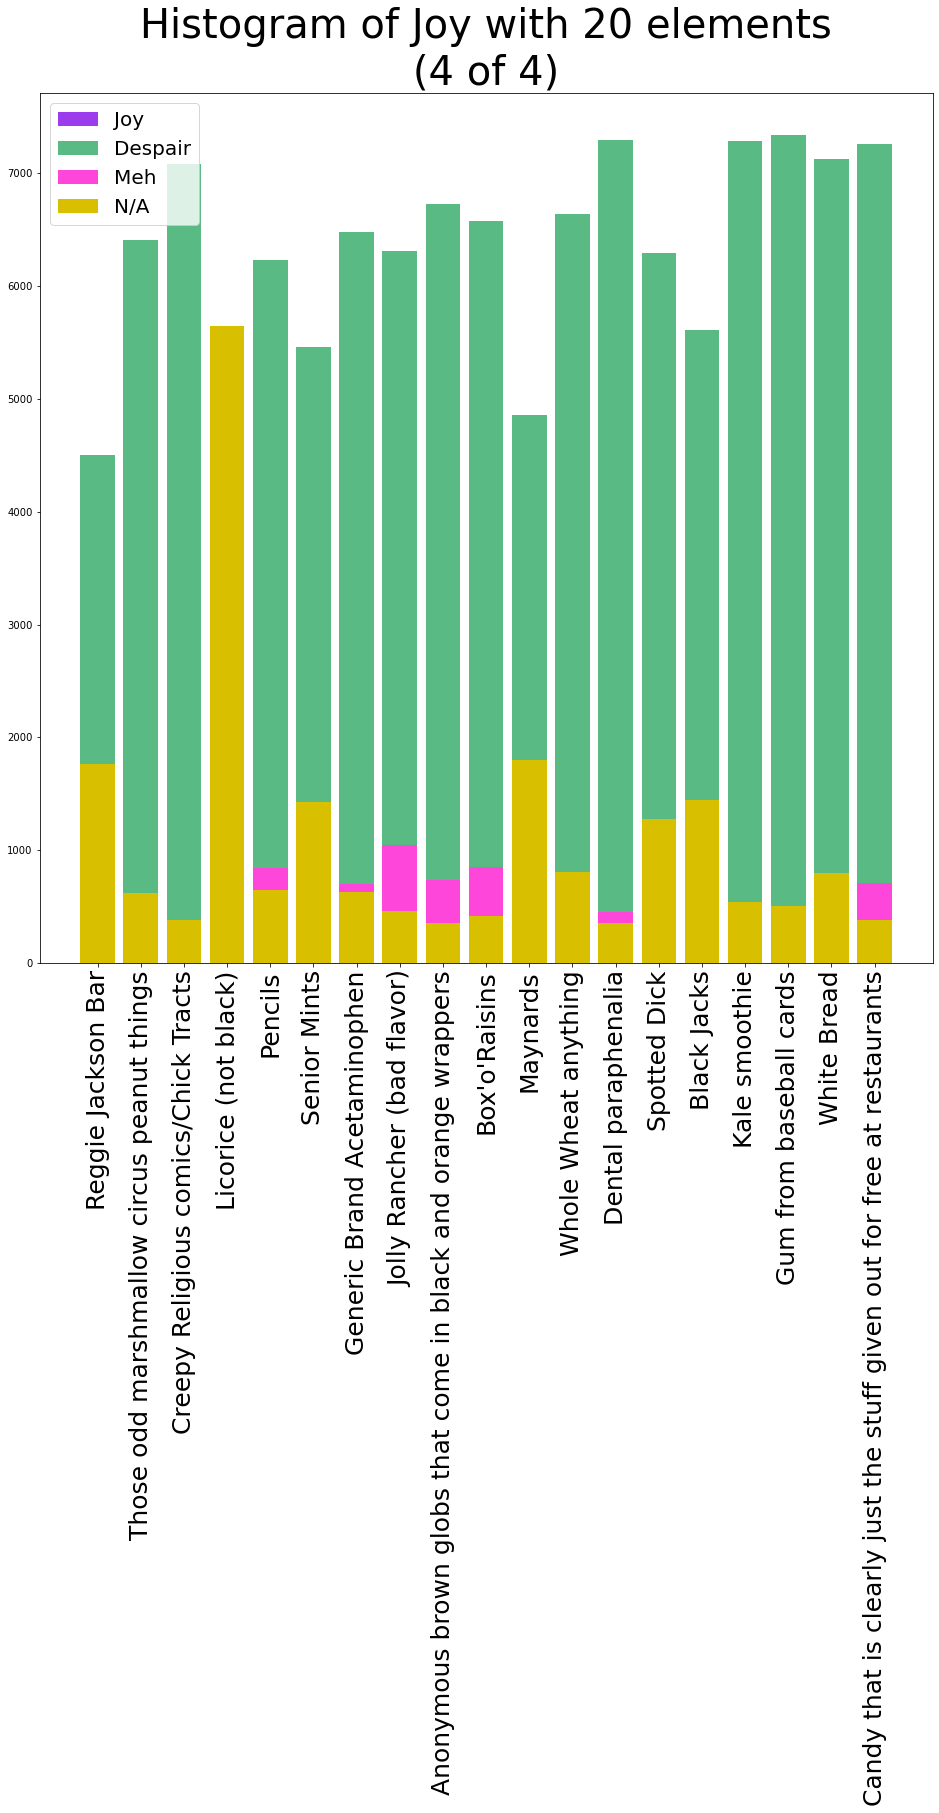

In [32]:
#//*** Draw Histogram based on Joy
#//*** Sort by DESPAIR!!!!!!!
#hist_df = hist_df.sort_values(by=sorted_values, ascending=False) 

#//*** Transpose, sort for joy, transpose for poltting
hist_df = hist_df.transpose().sort_values(by='Joy',ascending=False).transpose()
sorted_values = [ 'Joy', 'Despair', 'Meh', 'N/A' ]

display_count = 20
width = .8



color_dict = {
    'Joy' : "#9b3ced",
    'Despair' : "#5ABA84",
    'Meh' : "#ff46db",
    'N/A' : "#d8bf00",
}

#for col in candy_cols:
#    counts_df[col] = candy_df[col].value_counts().sort_index().rename(index=pretty_rows)



#//*** Set the default display size to 80% of the display count. It adds some flexibility to the display size.
plt.rcParams['figure.figsize'] = [display_count*.8, display_count*.8] 

#//*** Divide the columns by the display_count size
#//*** The columns are divided by column index value
for graph_loop in range(0,int( (len(candy_cols)/ display_count))):
    
    #//*** Create the Start index of columns
    min_dex = (graph_loop*display_count)
    #//*** Create the end index of columns
    max_dex = min_dex +(display_count-1)
    

    fig,ax = plt.subplots()
    
    #//*** Draw each bar based on the order of sorted values OF DESPAIR!!!
    #//*** Single line of code generates a bar chart for each value "Despair/Joy/Meh/NA"
    #//*** The .loc is the row value using min_dex & max_dex to select the columns.
    for row in sorted_values:
            ax.bar(hist_df.loc[row].index[min_dex:max_dex],hist_df.loc[row][min_dex:max_dex],width, color=color_dict[row], label=row)

    
    plt.xticks(rotation=90,fontsize=display_count*1.25)

    handles,labels = deduplicate_legend(ax)
    plt.legend(handles,labels, fontsize=display_count)
    plt.title(f"Histogram of Joy with {display_count} elements\n({graph_loop+1} of {int( (len(candy_cols)/ display_count))})",fontsize=display_count*2)
    plt.show()
    
plt.rcParams['figure.figsize'] = [10,10] 

,Any full-sized candy bar,Kit Kat,Reese’s Peanut Butter Cups,Twix,Snickers,"Cash, or other forms of legal tender",Regular M&Ms,Peanut M&M’s,Nestle Crunch,Milky Way,...,Jolly Ranchers (good flavor),Cadbury Creme Eggs,Smarties (American),Gummy Bears straight up,Swedish Fish,LemonHeads,Glow sticks,Mint Juleps,Licorice (not black),Vicodin
Joy,7589.000000,7252.000000,7369.000000,6990.000000,6991.000000,6814.000000,6101.000000,6456.000000,6117.000000,6030.000000,...,4517.000000,4432.000000,4159.000000,4196.000000,4139.000000,3782.000000,3775.000000,3827.00000,943.000000,3716.000000
Despair,407.000000,597.000000,685.000000,768.000000,833.000000,1073.000000,1134.000000,1246.000000,1193.000000,1295.000000,...,2599.000000,2861.000000,2960.000000,3015.000000,2979.000000,3041.000000,3239.000000,3307.00000,853.000000,3654.000000
feels,0.898199,0.847879,0.829898,0.802011,0.787065,0.727907,0.686524,0.676448,0.673598,0.646416,...,0.269533,0.215412,0.168423,0.163778,0.162967,0.108603,0.076419,0.07289,0.050111,0.008412


1
0


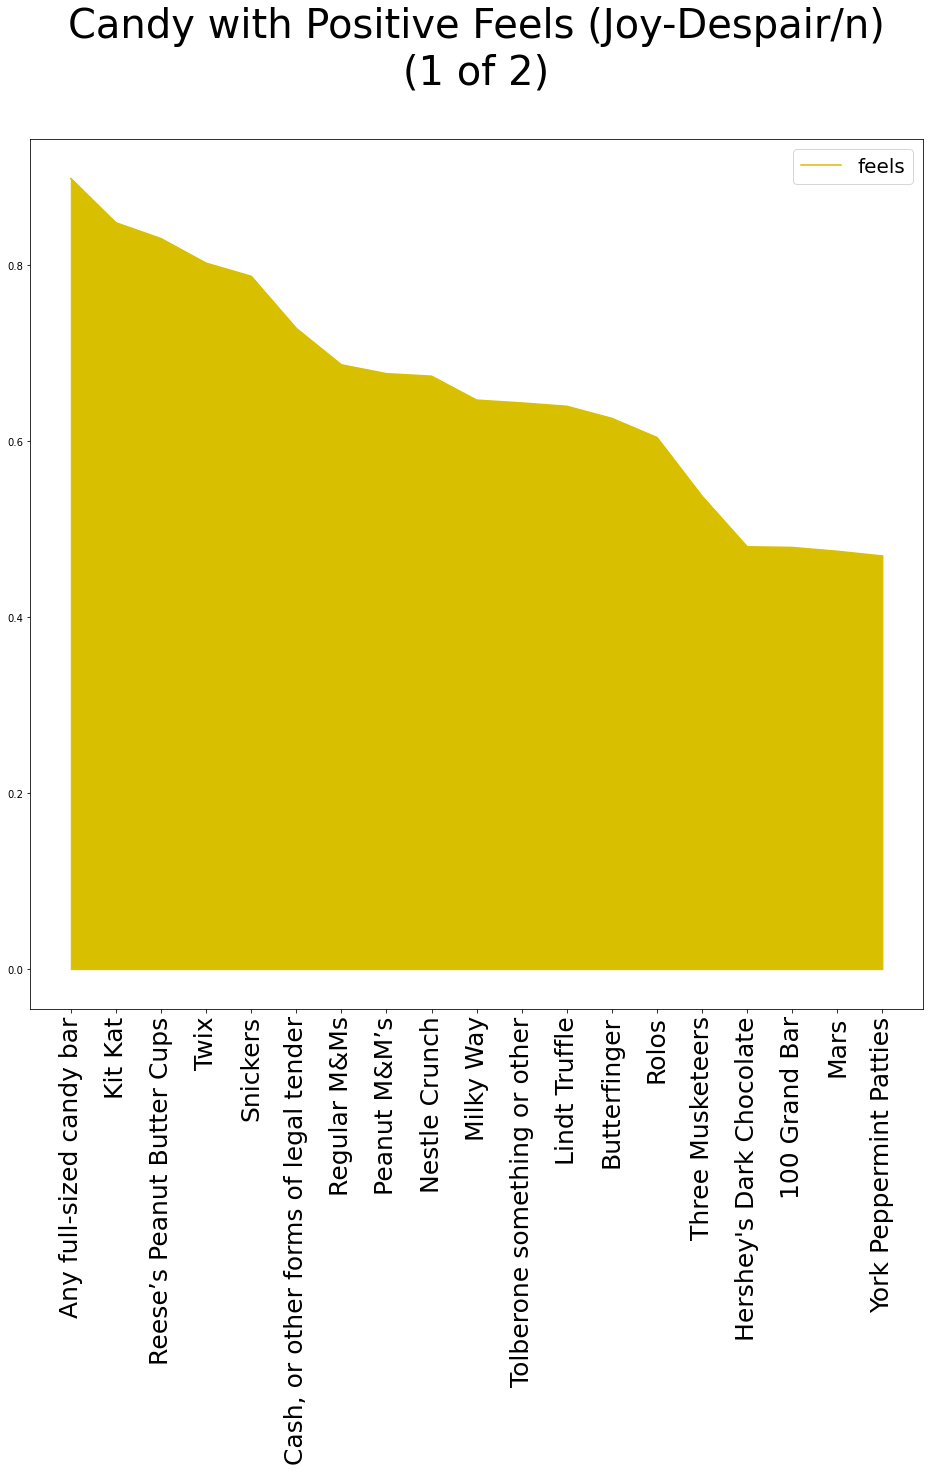

1


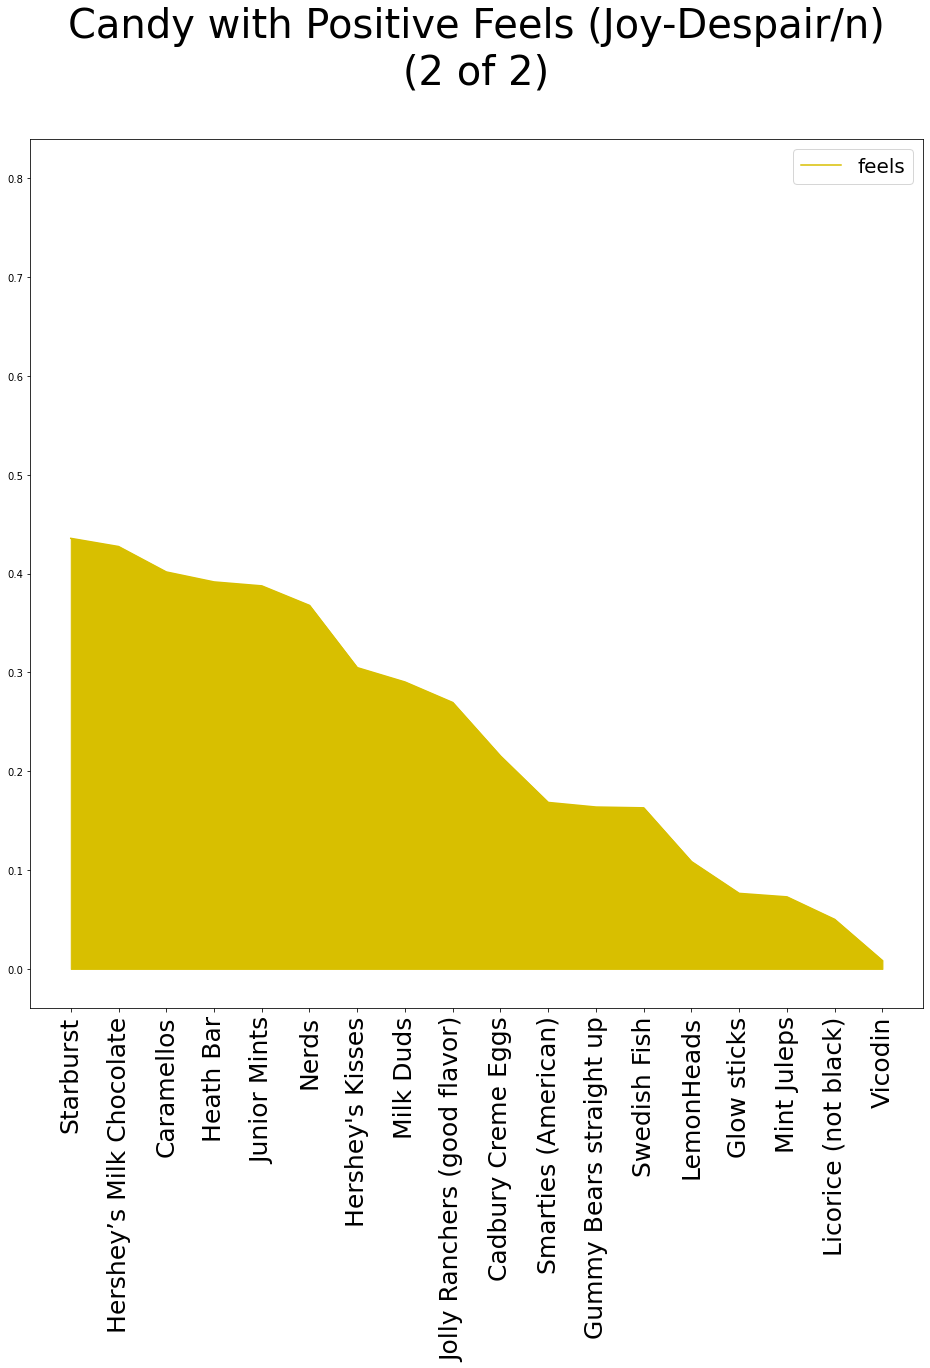

In [121]:
#//*** Generate a line Chart of the Feels. Joy - Despair / joy + despair
compute_df = hist_df.transpose()

compute_df['feels'] = (compute_df['Joy'] - compute_df['Despair']) / (compute_df['Joy'] + compute_df['Despair'])
compute_df.pop('Meh')
compute_df.pop('N/A')
joyful_candy_df = compute_df[compute_df['feels'] >= 0].sort_values('feels', ascending=False).transpose()


display_count = 20
width = .8



color_dict = {
    'Joy' : "#9b3ced",
    'Despair' : "#5ABA84",
    'Meh' : "#ff46db",
    'N/A' : "#d8bf00",
    'feels' : "#d8bf00",
}

#for col in candy_cols:
#    counts_df[col] = candy_df[col].value_counts().sort_index().rename(index=pretty_rows)

draw_df = joyful_candy_df

print(int( (len(draw_df.columns)/ display_count)))
#//*** Set the default display size to 80% of the display count. It adds some flexibility to the display size.
plt.rcParams['figure.figsize'] = [display_count*.8, display_count*.8] 

#//*** Divide the columns by the display_count size
#//*** The columns are divided by column index value
for graph_loop in range(0,int( (len(draw_df.columns)/ display_count))+1):
    print(graph_loop)
    #//*** Create the Start index of columns
    min_dex = (graph_loop*display_count)
    #//*** Create the end index of columns
    max_dex = min_dex +(display_count-1)
    

    fig,ax = plt.subplots()
    
    #//*** Draw each bar based on the order of sorted values OF DESPAIR!!!
    #//*** Single line of code generates a bar chart for each value "Despair/Joy/Meh/NA"
    #//*** The .loc is the row value using min_dex & max_dex to select the columns.
    for row in ['feels']:
            ax.plot(joyful_candy_df.loc[row].index[min_dex:max_dex],joyful_candy_df.loc[row][min_dex:max_dex],width, color=color_dict[row], label=row)
            plt.fill_between(joyful_candy_df.loc[row].index[min_dex:max_dex],joyful_candy_df.loc[row][min_dex:max_dex],0,color=color_dict[row])

    
    plt.xticks(rotation=90,fontsize=display_count*1.25)

    handles,labels = deduplicate_legend(ax)
    plt.legend(handles,labels, fontsize=display_count)
    plt.title(f"Candy with Positive Feels (Joy-Despair/n)\n({graph_loop+1} of {int( (len(draw_df.columns)/ display_count))+1})\n",fontsize=display_count*2)
    plt.show()
    
plt.rcParams['figure.figsize'] = [10,10] 

1
0


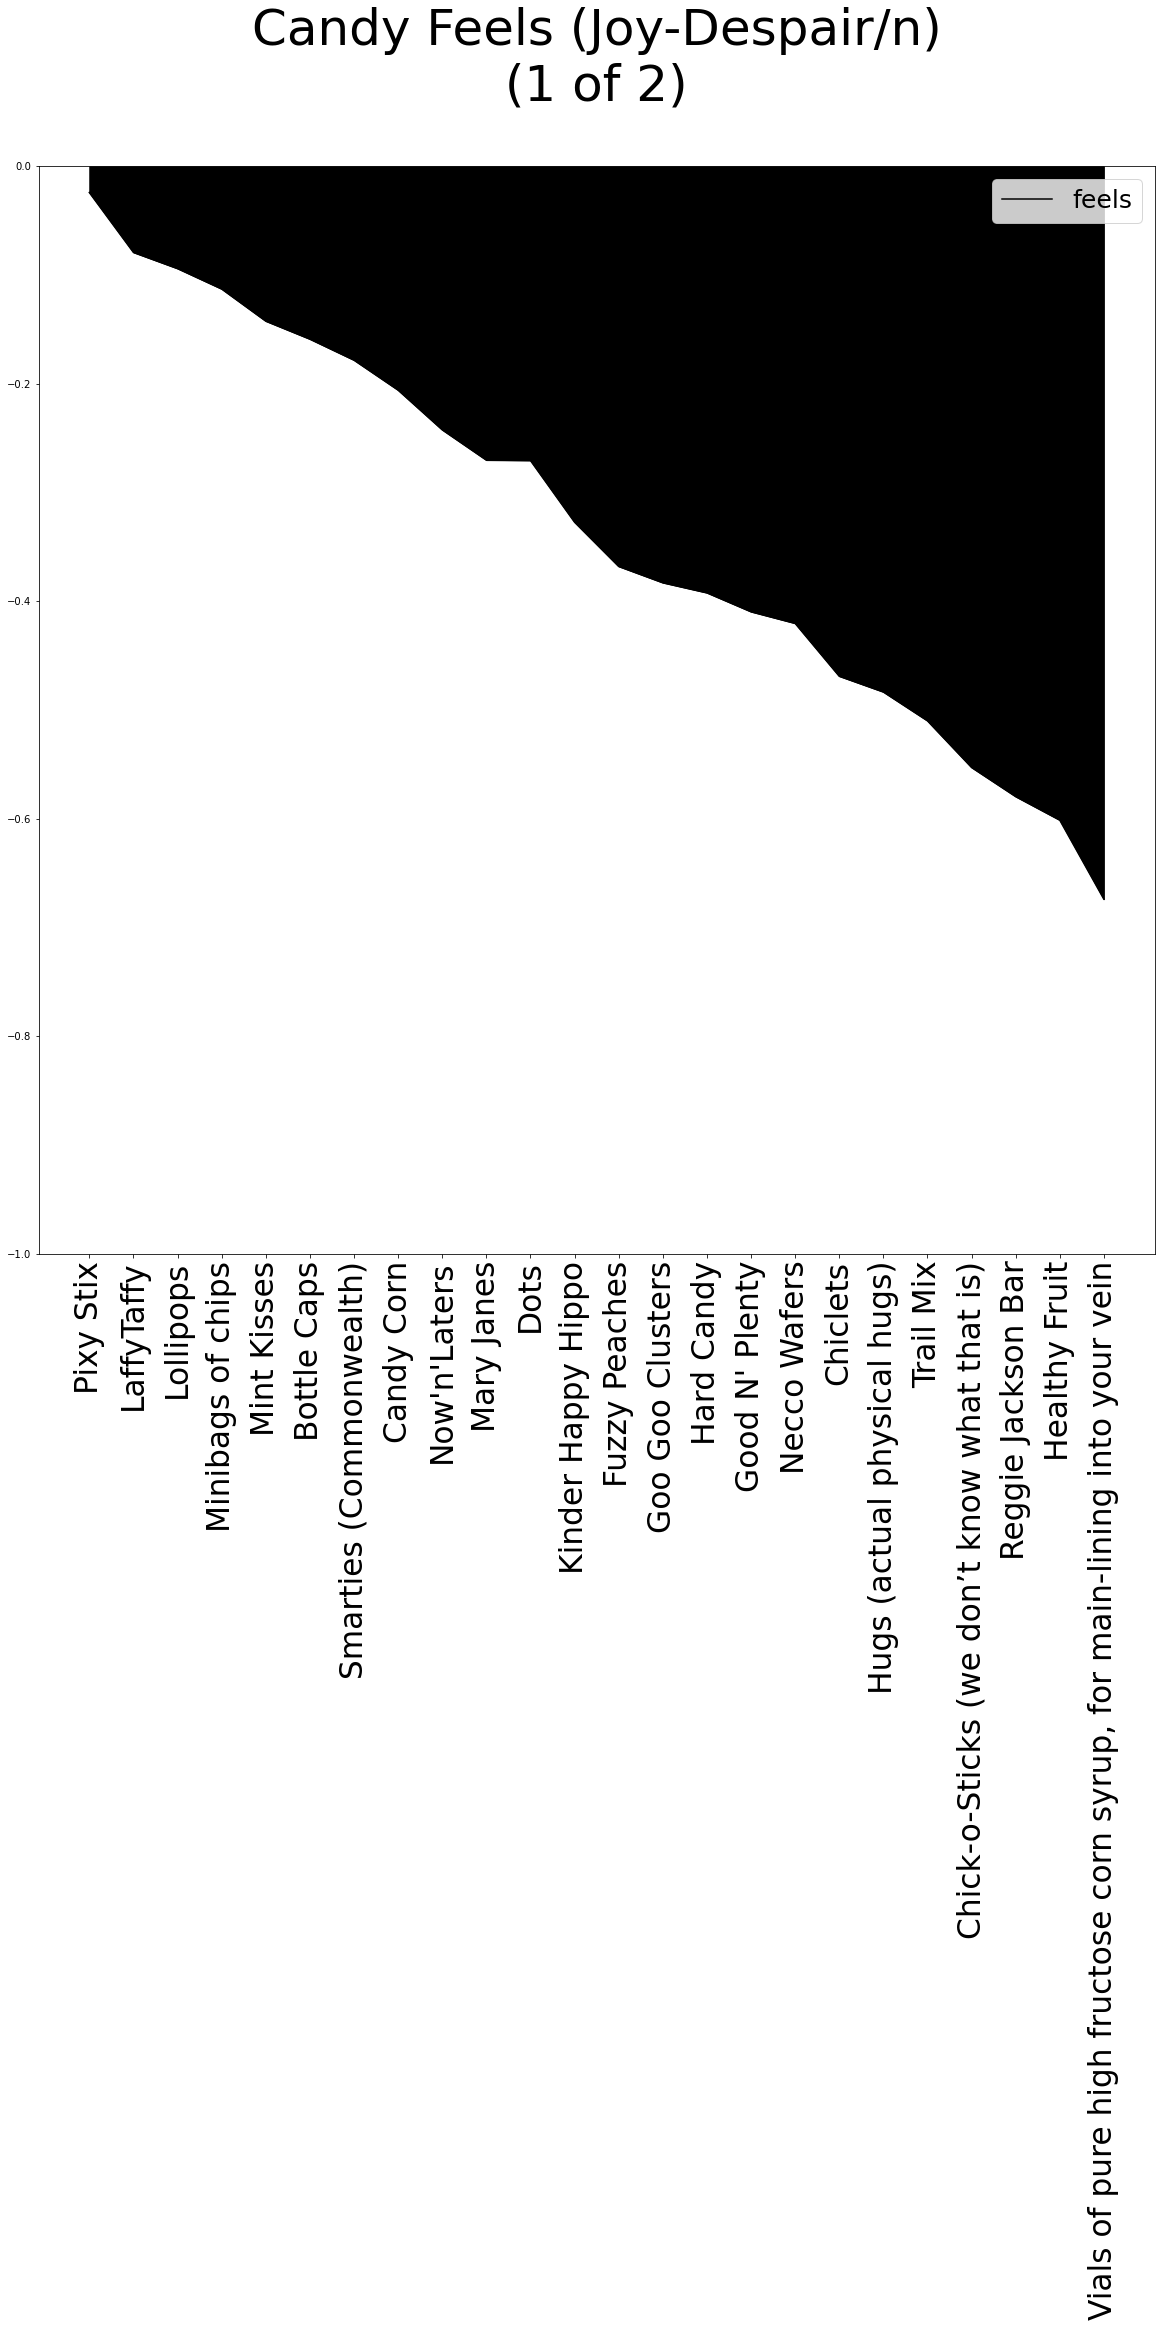

1


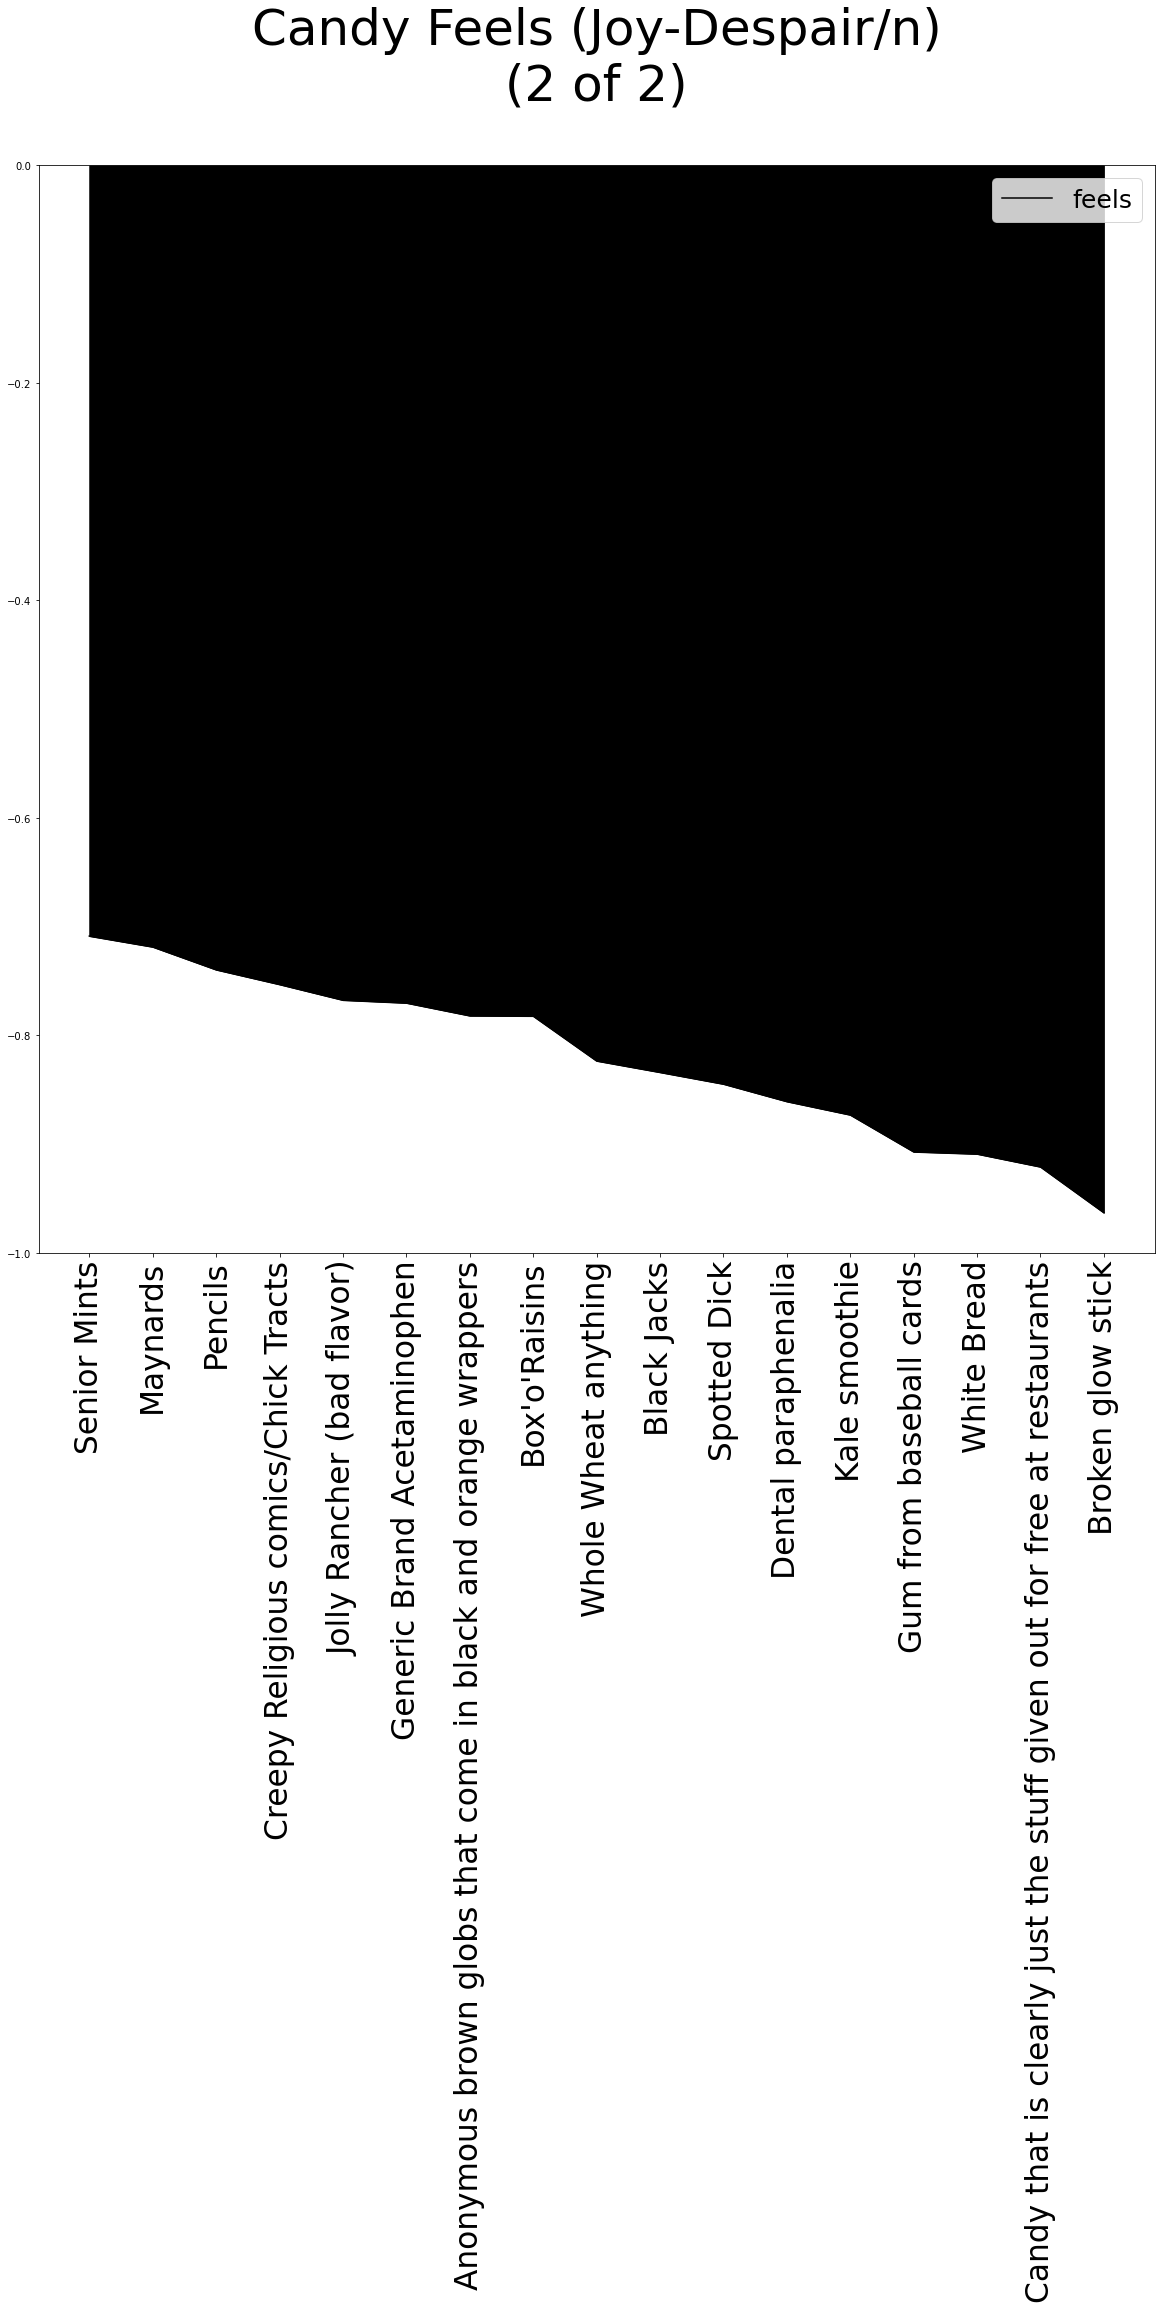

In [128]:
despair_candy_df = joyful_candy_df = compute_df[compute_df['feels'] < 0].sort_values('feels',ascending=False).transpose()

display_count = 25
width = .8



color_dict = {
    'Joy' : "#9b3ced",
    'Despair' : "#5ABA84",
    'Meh' : "#ff46db",
    'N/A' : "#d8bf00",
    'feels' : "#d8bf00",
}

#for col in candy_cols:
#    counts_df[col] = candy_df[col].value_counts().sort_index().rename(index=pretty_rows)

draw_df = joyful_candy_df

print(int( (len(draw_df.columns)/ display_count)))
#//*** Set the default display size to 80% of the display count. It adds some flexibility to the display size.
plt.rcParams['figure.figsize'] = [display_count*.8, display_count*.8] 

#//*** Divide the columns by the display_count size
#//*** The columns are divided by column index value
for graph_loop in range(0,int( (len(draw_df.columns)/ display_count))+1):
    print(graph_loop)
    #//*** Create the Start index of columns
    min_dex = (graph_loop*display_count)
    #//*** Create the end index of columns
    max_dex = min_dex +(display_count-1)
    

    fig,ax = plt.subplots()
    
    #//*** Draw each bar based on the order of sorted values OF DESPAIR!!!
    #//*** Single line of code generates a bar chart for each value "Despair/Joy/Meh/NA"
    #//*** The .loc is the row value using min_dex & max_dex to select the columns.
    for row in ['feels']:
            ax.plot(joyful_candy_df.loc[row].index[min_dex:max_dex],joyful_candy_df.loc[row][min_dex:max_dex],width, color='black', label=row)

            plt.fill_between(joyful_candy_df.loc[row].index[min_dex:max_dex],joyful_candy_df.loc[row][min_dex:max_dex],0,color='black')
    plt.xticks(rotation=90,fontsize=display_count*1.25)

    handles,labels = deduplicate_legend(ax)
    plt.ylim(-1,0)
    plt.legend(handles,labels, fontsize=display_count)
    plt.title(f"Candy Feels (Joy-Despair/n)\n({graph_loop+1} of {int( (len(draw_df.columns)/ display_count))+1})\n",fontsize=display_count*2)
    plt.show()
    
plt.rcParams['figure.figsize'] = [10,10] 